In [4]:
import pandas as pd #Dataframe을 이용하기 위해 임폴트해준다.
code_df= pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]
#code_df는 해당 URL을 불러온다.
code_df.종목코드 = code_df.종목코드.map('{:06d}'.format) 
#주식의 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정한다.
code_df = code_df[['회사명', '종목코드']] 
# code_df에는 회사명, 종목코드의 컬럼만 사용한다. 즉 나머지 컬럼의 경우 사용할 필요가 없기 때문에 사용하지 않는다. 
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'}) 
# 한글로된 컬럼명을 영어로 바꿔준다.  
code_df
# code_df를 보여준다. 

name    code
0          BYC  001460
1       CJ CGV  079160
2       DB손해보험  005830
3      DGB금융지주  139130
4        DSR제강  069730
5         KB금융  105560
6      KC그린홀딩스  009440
7     KISCO홀딩스  001940
8      LS전선아시아  229640
9        MH에탄올  023150
10        NICE  034310
11      S&T홀딩스  036530
12       SK텔레콤  017670
13      STX중공업  071970
14        계양전기  012200
15     골든브릿지증권  001290
16        기업은행  024110
17       깨끗한나라  004540
18        남광토건  001260
19        남해화학  025860
20         다스코  058730
21       대구백화점  006370
22        대신증권  003540
23        대한제분  001130
24        대한항공  003490
25        대한해운  005880
26       대호에이엘  069460
27        덕양산업  024900
28         덴티움  145720
29         디씨엠  024090
...        ...     ...
2167   한국테크놀로지  053590
2168     한라IMS  092460
2169     한양이엔지  045100
2170    현대아이비티  048410
2171      현진소재  053660
2172      화일약품  061250
2173     효성오앤비  097870
2174       휴맥스  115160
2175      휴메딕스  200670
2176        힘스  238490
2177      라온테크  232680
2178      럭스피아  092590
2179       미애부  225850
2180   바이오시네틱스  281310
2181     바이오코아  216400
2182        볼빅  206950
2183   비플라이소프트  148780
2184     세신버팔로  110660
2185       수젠텍  253840
2186       시큐센  232830
2187      에브리봇  270660
2188   에스알바이오텍  270210
2189  에스에이티이엔지  158300
2190      영현무역  242850
2191       이엠티  232530
2192      인터코스  240340
2193       제노텍  066830
2194  포인트엔지니어링  176560
2195   피엠디아카데미  144740
2196    한중엔시에스  107640

[2197 rows x 2 columns]

In [5]:
code_df.to_csv('주식_금융.csv',encoding="cp949", mode="w",index=True)
# CSV파일로 먼저 한번 저장한다. 

In [6]:
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러온다.
# 네이버 금융(http://finance.naver.com)에 해당 코드를 입력한다. 
    print("요청 URL = {}".format(url)) 
    return url
# 해당 코드에 맞는 주식에 대한 정보를 네이버에서 불러온다. 
# Url을 출력해준다. 
item_name='KB금융' 
# KB금융  : KB_bank
# CJ : cj
# NAVER : naver
# SBS : sbs
# 신세계푸드 : S_food
# YG PLUS : YG_plus
# iMBC : Imbc
# CJ씨푸드 : cj_food
# 농심 : Nong
# 오뚜기 : o_dg
# 대한항공 : K_a
# 포스코 : posco
# 삼성전자 : samsung
# 아시아나항공 : A_a
# 하이즈항공 : H_a

# 해당하는 기업들의 이름을 넣는다. 위의 코드와 동일하게 나머지 기업들도 동일하게 진행한다. 
url = get_url(item_name, code_df) # url에는 기업이름과 코드 번호를 얻는다. 
KB_bank = pd.DataFrame() # 일자 데이터를 담을 df라는 DataFrame를 생성한다.
for page in range(1, 11):  
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    KB_bank = KB_bank.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
# 1페이지에서 11페이지의 데이터만 가져온다. 즉 2018년 1원 근처부터 현재까지 불러온다. 
# 해당 기업의 url에 맞는 정보를 DataFrame에 추가한다. 
    
KB_bank = KB_bank.dropna() 
# df.dropna()를 이용해서 nan값을 제거한다.
KB_bank

요청 URL = http://finance.naver.com/item/sise_day.nhn?code=105560


날짜     종가   전일비     시가     고가     저가      거래량
0   2018.06.20  55600   500  55300  56600  55300   225045
1   2018.06.19  55100   400  53700  55400  53500  1041392
2   2018.06.18  55500   500  54500  56000  54500   788877
3   2018.06.15  55000  1000  55900  55900  53800  1356778
4   2018.06.14  56000   900  57000  57200  55600  1174871
5   2018.06.12  56900   500  58000  58100  56700  1020141
6   2018.06.11  57400  1400  55800  57500  55800  1129584
7   2018.06.08  56000   100  56100  56700  55700  1038272
8   2018.06.07  56100  1100  56700  57100  55900  1366695
9   2018.06.05  55000   600  54700  55400  54400  1107743
10  2018.06.04  54400  2100  53000  54700  52800  1480544
11  2018.06.01  52300   500  52600  52800  52100   860865
12  2018.05.31  51800   600  53100  53100  51800  2297882
13  2018.05.30  52400  2200  53700  54500  52000  2116671
14  2018.05.29  54600   500  55000  55000  54300   784317
15  2018.05.28  55100   300  55100  55900  54900   816560
16  2018.05.25  55400   600  56300  56500  55300   802051
17  2018.05.24  56000   600  55900  56700  55800  1006400
18  2018.05.23  55400   500  55000  55900  55000  1057821
19  2018.05.21  55900   500  56100  56500  55300   933470
20  2018.05.18  56400  1200  57400  57600  56000   945596
21  2018.05.17  57600     0  57700  58100  57500   709917
22  2018.05.16  57600   300  57700  57800  57200   637333
23  2018.05.15  57300   900  58200  58300  57100   963720
24  2018.05.14  58200     0  58000  58700  58000   593203
25  2018.05.11  58200   200  58000  58500  57800   544837
26  2018.05.10  58000   200  58100  59300  58000   945925
27  2018.05.09  58200   200  57900  58500  57100  1254153
28  2018.05.08  58400   800  58300  59000  58100  1428139
29  2018.05.04  59200  1100  59700  59800  58600   884383
..         ...    ...   ...    ...    ...    ...      ...
70  2018.03.07  61500   800  61600  62300  60800  1339022
71  2018.03.06  62300   100  62300  63200  61800   849105
72  2018.03.05  62200  1300  64400  64400  62100   772379
73  2018.03.02  63500   500  64800  64800  62500  1052502
74  2018.02.28  64000     0  63300  64300  63300  1210922
75  2018.02.27  64000   100  64400  65100  64000  1464168
76  2018.02.26  64100   600  64000  64600  63600  1775757
77  2018.02.23  64700   200  65000  65400  64300  1109087
78  2018.02.22  64900   600  64600  65500  64300   940706
79  2018.02.21  65500  1200  66400  66400  65100  1060667
80  2018.02.20  66700   100  66700  67000  66300   742233
81  2018.02.19  66800  2000  66000  67100  65600   774866
82  2018.02.14  64800   600  64200  64900  63700   755164
83  2018.02.13  64200   100  64900  65200  63400  1535441
84  2018.02.12  64300  3300  62200  64500  61600  1222428
85  2018.02.09  61000   400  60200  61700  60100  1374096
86  2018.02.08  61400  1700  63000  63400  61100  1651633
87  2018.02.07  63100  1100  64500  65100  63000  1164430
88  2018.02.06  64200  3500  66300  66400  63500  1777390
89  2018.02.05  67700  1300  67000  68000  66200  1414389
90  2018.02.02  66400   300  66100  66900  65300   998113
91  2018.02.01  66100  1200  66000  67000  65800   914632
92  2018.01.31  67300   400  66400  67500  64600  1206737
93  2018.01.30  66900   300  67000  67700  66600   911296
94  2018.01.29  67200   200  67900  68300  67000   784099
95  2018.01.26  67400   800  66300  67500  66000   933977
96  2018.01.25  66600   900  67100  67900  66500   836419
97  2018.01.24  67500  1100  68000  68500  67300   724918
98  2018.01.23  68600  2900  65900  68600  65900   899249
99  2018.01.22  65700  1400  68000  68400  65700   917484

[100 rows x 7 columns]

In [7]:
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러온다.
# 네이버 금융(http://finance.naver.com)에 해당 코드를 입력한다. 
    print("요청 URL = {}".format(url)) 
    return url
# 해당 코드에 맞는 주식에 대한 정보를 네이버에서 불러온다. 
# Url을 출력해준다. 
item_name='CJ' 
# CJ
# NAVER
# SBS
# 신세계푸드
# YG PLUS
# iMBC
# CJ씨푸드
# 농심
# 오뚜기
# 대한항공
# 포스코
# 삼성전자
# 아시아나항공
# 하이즈항공 

# 해당하는 기업들의 이름을 넣는다. 위의 코드와 동일하게 나머지 기업들도 동일하게 진행한다. 
url = get_url(item_name, code_df) # url에는 기업이름과 코드 번호를 얻는다. 
cj = pd.DataFrame() # 일자 데이터를 담을 df라는 DataFrame를 생성한다.
for page in range(1, 11):  
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    cj = cj.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
# 1페이지에서 11페이지의 데이터만 가져온다. 즉 2018년 1원 근처부터 현재까지 불러온다. 
# 해당 기업의 url에 맞는 정보를 DataFrame에 추가한다. 
    
cj = cj.dropna() 
# df.dropna()를 이용해서 nan값을 제거한다.


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=001040


In [8]:
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러온다.
# 네이버 금융(http://finance.naver.com)에 해당 코드를 입력한다. 
    print("요청 URL = {}".format(url)) 
    return url
# 해당 코드에 맞는 주식에 대한 정보를 네이버에서 불러온다. 
# Url을 출력해준다. 
item_name='NAVER' 
# NAVER
# SBS
# 신세계푸드
# YG PLUS
# iMBC
# CJ씨푸드
# 농심
# 오뚜기
# 대한항공
# 포스코
# 삼성전자
# 아시아나항공
# 하이즈항공 

# 해당하는 기업들의 이름을 넣는다. 위의 코드와 동일하게 나머지 기업들도 동일하게 진행한다. 
url = get_url(item_name, code_df) # url에는 기업이름과 코드 번호를 얻는다. 
naver = pd.DataFrame() # 일자 데이터를 담을 df라는 DataFrame를 생성한다.
for page in range(1, 11):  
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    naver = naver.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
# 1페이지에서 11페이지의 데이터만 가져온다. 즉 2018년 1원 근처부터 현재까지 불러온다. 
# 해당 기업의 url에 맞는 정보를 DataFrame에 추가한다. 
    
naver = naver.dropna() 
# df.dropna()를 이용해서 nan값을 제거한다.


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=035420


In [9]:
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러온다.
# 네이버 금융(http://finance.naver.com)에 해당 코드를 입력한다. 
    print("요청 URL = {}".format(url)) 
    return url
# 해당 코드에 맞는 주식에 대한 정보를 네이버에서 불러온다. 
# Url을 출력해준다. 
item_name='SBS' 
# SBS
# 신세계푸드
# YG PLUS
# iMBC
# CJ씨푸드
# 농심
# 오뚜기
# 대한항공
# 포스코
# 삼성전자
# 아시아나항공
# 하이즈항공 

# 해당하는 기업들의 이름을 넣는다. 위의 코드와 동일하게 나머지 기업들도 동일하게 진행한다. 
url = get_url(item_name, code_df) # url에는 기업이름과 코드 번호를 얻는다. 
sbs = pd.DataFrame() # 일자 데이터를 담을 df라는 DataFrame를 생성한다.
for page in range(1, 11):  
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    sbs = sbs.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
# 1페이지에서 11페이지의 데이터만 가져온다. 즉 2018년 1원 근처부터 현재까지 불러온다. 
# 해당 기업의 url에 맞는 정보를 DataFrame에 추가한다. 
    
sbs = sbs.dropna() 
# df.dropna()를 이용해서 nan값을 제거한다.


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=034120


In [10]:
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러온다.
# 네이버 금융(http://finance.naver.com)에 해당 코드를 입력한다. 
    print("요청 URL = {}".format(url)) 
    return url
# 해당 코드에 맞는 주식에 대한 정보를 네이버에서 불러온다. 
# Url을 출력해준다. 
item_name='신세계푸드' 
# YG PLUS
# iMBC
# CJ씨푸드
# 농심
# 오뚜기
# 대한항공
# 포스코
# 삼성전자
# 아시아나항공
# 하이즈항공 

# 해당하는 기업들의 이름을 넣는다. 위의 코드와 동일하게 나머지 기업들도 동일하게 진행한다. 
url = get_url(item_name, code_df) # url에는 기업이름과 코드 번호를 얻는다. 
S_food = pd.DataFrame() # 일자 데이터를 담을 df라는 DataFrame를 생성한다.
for page in range(1, 11):  
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    S_food = S_food.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
# 1페이지에서 11페이지의 데이터만 가져온다. 즉 2018년 1원 근처부터 현재까지 불러온다. 
# 해당 기업의 url에 맞는 정보를 DataFrame에 추가한다. 
    
S_food = S_food.dropna() 
# df.dropna()를 이용해서 nan값을 제거한다.


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=031440


In [11]:
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러온다.
# 네이버 금융(http://finance.naver.com)에 해당 코드를 입력한다. 
    print("요청 URL = {}".format(url)) 
    return url
# 해당 코드에 맞는 주식에 대한 정보를 네이버에서 불러온다. 
# Url을 출력해준다. 
item_name='YG PLUS' 
# YG PLUS
# iMBC
# CJ씨푸드
# 농심
# 오뚜기
# 대한항공
# 포스코
# 삼성전자
# 아시아나항공
# 하이즈항공 

# 해당하는 기업들의 이름을 넣는다. 위의 코드와 동일하게 나머지 기업들도 동일하게 진행한다. 
url = get_url(item_name, code_df) # url에는 기업이름과 코드 번호를 얻는다. 
YG_plus = pd.DataFrame() # 일자 데이터를 담을 df라는 DataFrame를 생성한다.
for page in range(1, 11):  
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    YG_plus = YG_plus.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
# 1페이지에서 11페이지의 데이터만 가져온다. 즉 2018년 1원 근처부터 현재까지 불러온다. 
# 해당 기업의 url에 맞는 정보를 DataFrame에 추가한다. 
    
YG_plus = YG_plus.dropna() 
# df.dropna()를 이용해서 nan값을 제거한다.


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=037270


In [12]:
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러온다.
# 네이버 금융(http://finance.naver.com)에 해당 코드를 입력한다. 
    print("요청 URL = {}".format(url)) 
    return url
# 해당 코드에 맞는 주식에 대한 정보를 네이버에서 불러온다. 
# Url을 출력해준다. 
item_name='iMBC' 
# iMBC
# CJ씨푸드
# 농심
# 오뚜기
# 대한항공
# 포스코
# 삼성전자
# 아시아나항공
# 하이즈항공 

# 해당하는 기업들의 이름을 넣는다. 위의 코드와 동일하게 나머지 기업들도 동일하게 진행한다. 
url = get_url(item_name, code_df) # url에는 기업이름과 코드 번호를 얻는다. 
Imbc = pd.DataFrame() # 일자 데이터를 담을 df라는 DataFrame를 생성한다.
for page in range(1, 11):  
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    Imbc = Imbc.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
# 1페이지에서 11페이지의 데이터만 가져온다. 즉 2018년 1원 근처부터 현재까지 불러온다. 
# 해당 기업의 url에 맞는 정보를 DataFrame에 추가한다. 
    
Imbc = Imbc.dropna() 
# df.dropna()를 이용해서 nan값을 제거한다.


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=052220


In [13]:
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러온다.
# 네이버 금융(http://finance.naver.com)에 해당 코드를 입력한다. 
    print("요청 URL = {}".format(url)) 
    return url
# 해당 코드에 맞는 주식에 대한 정보를 네이버에서 불러온다. 
# Url을 출력해준다. 
item_name='CJ씨푸드' 
# CJ씨푸드
# 농심
# 오뚜기
# 대한항공
# 포스코
# 삼성전자
# 아시아나항공
# 하이즈항공 

# 해당하는 기업들의 이름을 넣는다. 위의 코드와 동일하게 나머지 기업들도 동일하게 진행한다. 
url = get_url(item_name, code_df) # url에는 기업이름과 코드 번호를 얻는다. 
cj_food = pd.DataFrame() # 일자 데이터를 담을 df라는 DataFrame를 생성한다.
for page in range(1, 11):  
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    cj_food = cj_food.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
# 1페이지에서 11페이지의 데이터만 가져온다. 즉 2018년 1원 근처부터 현재까지 불러온다. 
# 해당 기업의 url에 맞는 정보를 DataFrame에 추가한다. 
    
cj_food = cj_food.dropna() 
# df.dropna()를 이용해서 nan값을 제거한다.


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=011150


In [14]:
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러온다.
# 네이버 금융(http://finance.naver.com)에 해당 코드를 입력한다. 
    print("요청 URL = {}".format(url)) 
    return url
# 해당 코드에 맞는 주식에 대한 정보를 네이버에서 불러온다. 
# Url을 출력해준다. 
item_name='농심' 
# 농심
# 오뚜기
# 대한항공
# 포스코
# 삼성전자
# 아시아나항공
# 하이즈항공 

# 해당하는 기업들의 이름을 넣는다. 위의 코드와 동일하게 나머지 기업들도 동일하게 진행한다. 
url = get_url(item_name, code_df) # url에는 기업이름과 코드 번호를 얻는다. 
Nong = pd.DataFrame() # 일자 데이터를 담을 df라는 DataFrame를 생성한다.
for page in range(1, 11):  
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    Nong = Nong.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
# 1페이지에서 11페이지의 데이터만 가져온다. 즉 2018년 1원 근처부터 현재까지 불러온다. 
# 해당 기업의 url에 맞는 정보를 DataFrame에 추가한다. 
    
Nong = Nong.dropna() 
# df.dropna()를 이용해서 nan값을 제거한다.


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=004370


In [15]:
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러온다.
# 네이버 금융(http://finance.naver.com)에 해당 코드를 입력한다. 
    print("요청 URL = {}".format(url)) 
    return url
# 해당 코드에 맞는 주식에 대한 정보를 네이버에서 불러온다. 
# Url을 출력해준다. 
item_name='오뚜기' 
# 오뚜기
# 대한항공
# 포스코
# 삼성전자
# 아시아나항공
# 하이즈항공 

# 해당하는 기업들의 이름을 넣는다. 위의 코드와 동일하게 나머지 기업들도 동일하게 진행한다. 
url = get_url(item_name, code_df) # url에는 기업이름과 코드 번호를 얻는다. 
o_dg = pd.DataFrame() # 일자 데이터를 담을 df라는 DataFrame를 생성한다.
for page in range(1, 11):  
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    o_dg = o_dg.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
# 1페이지에서 11페이지의 데이터만 가져온다. 즉 2018년 1원 근처부터 현재까지 불러온다. 
# 해당 기업의 url에 맞는 정보를 DataFrame에 추가한다. 
    
o_dg = o_dg.dropna() 
# df.dropna()를 이용해서 nan값을 제거한다.


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=007310


In [16]:
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러온다.
# 네이버 금융(http://finance.naver.com)에 해당 코드를 입력한다. 
    print("요청 URL = {}".format(url)) 
    return url
# 해당 코드에 맞는 주식에 대한 정보를 네이버에서 불러온다. 
# Url을 출력해준다. 
item_name='대한항공' 
# 대한항공
# 포스코
# 삼성전자
# 아시아나항공
# 하이즈항공 

# 해당하는 기업들의 이름을 넣는다. 위의 코드와 동일하게 나머지 기업들도 동일하게 진행한다. 
url = get_url(item_name, code_df) # url에는 기업이름과 코드 번호를 얻는다. 
K_a = pd.DataFrame() # 일자 데이터를 담을 df라는 DataFrame를 생성한다.
for page in range(1, 11):  
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    K_a = K_a.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
# 1페이지에서 11페이지의 데이터만 가져온다. 즉 2018년 1원 근처부터 현재까지 불러온다. 
# 해당 기업의 url에 맞는 정보를 DataFrame에 추가한다. 
    
K_a = K_a.dropna() 
# df.dropna()를 이용해서 nan값을 제거한다.


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=003490


In [17]:
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러온다.
# 네이버 금융(http://finance.naver.com)에 해당 코드를 입력한다. 
    print("요청 URL = {}".format(url)) 
    return url
# 해당 코드에 맞는 주식에 대한 정보를 네이버에서 불러온다. 
# Url을 출력해준다. 
item_name='포스코' 
# 포스코
# 삼성전자
# 아시아나항공
# 하이즈항공 

# 해당하는 기업들의 이름을 넣는다. 위의 코드와 동일하게 나머지 기업들도 동일하게 진행한다. 
url = get_url(item_name, code_df) # url에는 기업이름과 코드 번호를 얻는다. 
posco = pd.DataFrame() # 일자 데이터를 담을 df라는 DataFrame를 생성한다.
for page in range(1, 11):  
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    posco = posco.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
# 1페이지에서 11페이지의 데이터만 가져온다. 즉 2018년 1원 근처부터 현재까지 불러온다. 
# 해당 기업의 url에 맞는 정보를 DataFrame에 추가한다. 
    
posco = posco.dropna() 
# df.dropna()를 이용해서 nan값을 제거한다.


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=005490


In [18]:
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러온다.
# 네이버 금융(http://finance.naver.com)에 해당 코드를 입력한다. 
    print("요청 URL = {}".format(url)) 
    return url
# 해당 코드에 맞는 주식에 대한 정보를 네이버에서 불러온다. 
# Url을 출력해준다. 
item_name='삼성전자'
# 삼성전자
# 아시아나항공
# 하이즈항공 

# 해당하는 기업들의 이름을 넣는다. 위의 코드와 동일하게 나머지 기업들도 동일하게 진행한다. 
url = get_url(item_name, code_df) # url에는 기업이름과 코드 번호를 얻는다. 
samsung = pd.DataFrame() # 일자 데이터를 담을 df라는 DataFrame를 생성한다.
for page in range(1, 11):  
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    samsung = samsung.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
# 1페이지에서 11페이지의 데이터만 가져온다. 즉 2018년 1원 근처부터 현재까지 불러온다. 
# 해당 기업의 url에 맞는 정보를 DataFrame에 추가한다. 
    
samsung = samsung.dropna() 
# df.dropna()를 이용해서 nan값을 제거한다.


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=005930


In [19]:
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러온다.
# 네이버 금융(http://finance.naver.com)에 해당 코드를 입력한다. 
    print("요청 URL = {}".format(url)) 
    return url
# 해당 코드에 맞는 주식에 대한 정보를 네이버에서 불러온다. 
# Url을 출력해준다. 
item_name='아시아나항공'
# 아시아나항공
# 하이즈항공 

# 해당하는 기업들의 이름을 넣는다. 위의 코드와 동일하게 나머지 기업들도 동일하게 진행한다. 
url = get_url(item_name, code_df) # url에는 기업이름과 코드 번호를 얻는다. 
A_a = pd.DataFrame() # 일자 데이터를 담을 df라는 DataFrame를 생성한다.
for page in range(1, 11):  
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    A_a = A_a.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
# 1페이지에서 11페이지의 데이터만 가져온다. 즉 2018년 1원 근처부터 현재까지 불러온다. 
# 해당 기업의 url에 맞는 정보를 DataFrame에 추가한다. 
    
A_a = A_a.dropna() 
# df.dropna()를 이용해서 nan값을 제거한다.
A_a

요청 URL = http://finance.naver.com/item/sise_day.nhn?code=020560


날짜    종가  전일비    시가    고가    저가      거래량
0   2018.06.20  4445   50  4395  4500  4395   323195
1   2018.06.19  4395  180  4570  4610  4395  1723933
2   2018.06.18  4575  135  4720  4740  4565  1696543
3   2018.06.15  4710  330  5010  5060  4710  2921426
4   2018.06.14  5040   50  5080  5090  4955  1554536
5   2018.06.12  5090  195  4920  5100  4910  2741000
6   2018.06.11  4895   30  4870  4930  4850   866444
7   2018.06.08  4865   10  4875  4945  4835   997563
8   2018.06.07  4875   40  4950  4965  4870  1330525
9   2018.06.05  4915   50  4970  5000  4905   848943
10  2018.06.04  4965   55  5000  5030  4955  1040010
11  2018.06.01  4910   45  4970  4975  4900   788781
12  2018.05.31  4955   10  4995  4995  4885  1094665
13  2018.05.30  4965   25  4985  4985  4875  1047833
14  2018.05.29  4990   80  5110  5120  4990   955342
15  2018.05.28  5070  135  4935  5090  4935  1419558
16  2018.05.25  4935   75  4970  4970  4890  1249350
17  2018.05.24  5010    0  5010  5050  4985   597716
18  2018.05.23  5010   60  5080  5100  5000  1026028
19  2018.05.21  5070   40  5130  5140  5060   763231
20  2018.05.18  5110   20  5020  5140  5020   684681
21  2018.05.17  5090   70  5110  5200  5070   881895
22  2018.05.16  5160  130  5240  5250  5130   955101
23  2018.05.15  5290  140  5160  5310  5160  1912067
24  2018.05.14  5150   50  5170  5220  5100  1144611
25  2018.05.11  5200   20  5200  5270  5170  1144211
26  2018.05.10  5180  150  5340  5340  5180  1205898
27  2018.05.09  5330  190  5190  5340  4995  2178624
28  2018.05.08  5140  150  5360  5390  5140  1914883
29  2018.05.04  5290   30  5430  5470  5260  2334210
..         ...   ...  ...   ...   ...   ...      ...
70  2018.03.07  4715   40  4685  4750  4660   837147
71  2018.03.06  4675  105  4640  4710  4620   882714
72  2018.03.05  4570  170  4740  4770  4560  1347350
73  2018.03.02  4740  300  4975  4980  4695  2544165
74  2018.02.28  5040   10  5030  5080  4985   833696
75  2018.02.27  5050   10  5090  5120  5050   848634
76  2018.02.26  5060  110  5220  5220  5020  1082469
77  2018.02.23  5170    0  5210  5220  5060   821038
78  2018.02.22  5170  130  5310  5330  5130   761094
79  2018.02.21  5300   60  5280  5340  5250   934703
80  2018.02.20  5240  100  5340  5340  5220   806657
81  2018.02.19  5340  240  5170  5340  5150  1676748
82  2018.02.14  5100   80  5210  5230  5020   975833
83  2018.02.13  5180   30  5190  5210  5110  1144598
84  2018.02.12  5150  120  5100  5180  5030  1495793
85  2018.02.09  5030   40  4900  5070  4900  1599738
86  2018.02.08  5070  100  5000  5120  5000  1689225
87  2018.02.07  4970  230  5350  5350  4970  2423513
88  2018.02.06  5200   60  4870  5230  4800  4098860
89  2018.02.05  5140  210  5200  5230  5030  2373332
90  2018.02.02  5350   50  5420  5530  5280  2309502
91  2018.02.01  5400   10  5440  5440  5330  1116003
92  2018.01.31  5410    0  5300  5440  5280  1570569
93  2018.01.30  5410   50  5460  5540  5270  2801757
94  2018.01.29  5460   60  5460  5690  5400  3847111
95  2018.01.26  5400   70  5360  5490  5320  2862373
96  2018.01.25  5330   90  5360  5430  5270  2928296
97  2018.01.24  5240   70  5240  5320  5170  2478088
98  2018.01.23  5170   80  5090  5210  5070  2077925
99  2018.01.22  5090   50  5140  5170  5040  1355821

[100 rows x 7 columns]

In [20]:
def get_url(item_name, code_df):
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code) 
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러온다.
# 네이버 금융(http://finance.naver.com)에 해당 코드를 입력한다. 
    print("요청 URL = {}".format(url)) 
    return url
# 해당 코드에 맞는 주식에 대한 정보를 네이버에서 불러온다. 
# Url을 출력해준다. 
item_name='하이즈항공'
# 하이즈항공 

# 해당하는 기업들의 이름을 넣는다. 위의 코드와 동일하게 나머지 기업들도 동일하게 진행한다. 
url = get_url(item_name, code_df) # url에는 기업이름과 코드 번호를 얻는다. 
H_a = pd.DataFrame() # 일자 데이터를 담을 df라는 DataFrame를 생성한다.
for page in range(1, 11):  
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    H_a = H_a.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
# 1페이지에서 11페이지의 데이터만 가져온다. 즉 2018년 1원 근처부터 현재까지 불러온다. 
# 해당 기업의 url에 맞는 정보를 DataFrame에 추가한다. 
    
H_a = H_a.dropna() 
# df.dropna()를 이용해서 nan값을 제거한다.


요청 URL = http://finance.naver.com/item/sise_day.nhn?code=221840


In [21]:
KB_bank = pd.DataFrame(KB_bank,columns={'날짜','전일비','고가','저가','거래량'})
cj = pd.DataFrame(cj,columns={'날짜','전일비','고가','저가','거래량'})
naver = pd.DataFrame(naver,columns={'날짜','전일비','고가','저가','거래량'})
sbs = pd.DataFrame(sbs,columns={'날짜','전일비','고가','저가','거래량'})
S_food = pd.DataFrame(S_food,columns={'날짜','전일비','고가','저가','거래량'})
YG_plus = pd.DataFrame(YG_plus,columns={'날짜','전일비','고가','저가','거래량'})
Imbc = pd.DataFrame(Imbc,columns={'날짜','전일비','고가','저가','거래량'})
cj_food = pd.DataFrame(cj_food,columns={'날짜','전일비','고가','저가','거래량'})
Nong = pd.DataFrame(Nong,columns={'날짜','전일비','고가','저가','거래량'})
o_dg  = pd.DataFrame(o_dg ,columns={'날짜','전일비','고가','저가','거래량'})
K_a = pd.DataFrame(K_a,columns={'날짜','전일비','고가','저가','거래량'})
posco = pd.DataFrame(posco,columns={'날짜','전일비','고가','저가','거래량'})
samsung = pd.DataFrame(samsung,columns={'날짜','전일비','고가','저가','거래량'})
A_a = pd.DataFrame(A_a,columns={'날짜','전일비','고가','저가','거래량'})
H_a  = pd.DataFrame(H_a,columns={'날짜','전일비','고가','저가','거래량'})

# 해당 기업들의 Dataframe에서 컬럼을 재설정한다. 

In [22]:
KB_bank.to_csv('KB금융_주식.csv',encoding="cp949", mode="w",index=True)
cj.to_csv('CJ_주식.csv',encoding="cp949", mode="w",index=True)
naver.to_csv('NAVER_주식.csv',encoding="cp949", mode="w",index=True)
sbs.to_csv('SBS_주식.csv',encoding="cp949", mode="w",index=True)
S_food.to_csv('신세계푸드_주식.csv',encoding="cp949", mode="w",index=True)
YG_plus.to_csv('YG_주식.csv',encoding="cp949", mode="w",index=True)
Imbc.to_csv('IMBC_주식.csv',encoding="cp949", mode="w",index=True)
cj_food.to_csv('CJ푸드_주식.csv',encoding="cp949", mode="w",index=True)
Nong.to_csv('농심_주식.csv',encoding="cp949", mode="w",index=True)
o_dg.to_csv('오뚜기_주식.csv',encoding="cp949", mode="w",index=True)
K_a.to_csv('대한항공_주식.csv',encoding="cp949", mode="w",index=True)
posco.to_csv('포스코_주식.csv',encoding="cp949", mode="w",index=True)
samsung.to_csv('삼성_주식.csv',encoding="cp949", mode="w",index=True)
A_a.to_csv('아시아나항공_주식.csv',encoding="cp949", mode="w",index=True)
H_a.to_csv('하이즈항공_주식.csv',encoding="cp949", mode="w",index=True)
# 컬럼이 재 설정 된 기업들의 정보를 CSV파일로 저장한다. 

In [23]:
import pandas as pd

In [24]:
KB_bank=pd.read_csv("KB금융_주식.csv",sep=",",encoding='cp949',engine="python")
cj=pd.read_csv("CJ_주식.csv",sep=",",encoding='cp949',engine="python")
naver=pd.read_csv("NAVER_주식.csv",sep=",",encoding='cp949',engine="python")
sbs=pd.read_csv("SBS_주식.csv",sep=",",encoding='cp949',engine="python")
S_food=pd.read_csv("신세계푸드_주식.csv",sep=",",encoding='cp949',engine="python")
YG_plus=pd.read_csv("YG_주식.csv",sep=",",encoding='cp949',engine="python")
Imbc=pd.read_csv("IMBC_주식.csv",sep=",",encoding='cp949',engine="python")
cj_food=pd.read_csv("CJ푸드_주식.csv",sep=",",encoding='cp949',engine="python")
Nong=pd.read_csv("농심_주식.csv",sep=",",encoding='cp949',engine="python")
o_dg=pd.read_csv("오뚜기_주식.csv",sep=",",encoding='cp949',engine="python")
K_a=pd.read_csv("대한항공_주식.csv",sep=",",encoding='cp949',engine="python")
posco=pd.read_csv("포스코_주식.csv",sep=",",encoding='cp949',engine="python")
samsung_food=pd.read_csv("삼성_주식.csv",sep=",",encoding='cp949',engine="python")
A_a=pd.read_csv("아시아나항공_주식.csv",sep=",",encoding='cp949',engine="python")
H_a=pd.read_csv("하이즈항공_주식.csv",sep=",",encoding='cp949',engine="python")

In [25]:
KB_bank = KB_bank.set_index('날짜')
cj = cj.set_index('날짜')
naver = naver.set_index('날짜')
sbs = sbs.set_index('날짜')
S_food = S_food.set_index('날짜')
YG_plus = YG_plus.set_index('날짜')
Imbc = Imbc.set_index('날짜')
cj_food = cj_food.set_index('날짜')
Nong = Nong.set_index('날짜')
o_dg = o_dg.set_index('날짜')
K_a = K_a.set_index('날짜')
posco = posco.set_index('날짜')
samsung = samsung.set_index('날짜')
A_a = A_a.set_index('날짜')
H_a = H_a.set_index('날짜')
# 각 기업들의 인덱스를 날짜로 정의한다. 

In [26]:
cj = cj.rename(columns={'고가':'CJ_고가', '저가':'CJ_저가','전일비':'CJ_변화량', '거래량':'CJ_수익'})
KB_bank = KB_bank.rename(columns={'고가':'KB금융_고가', '저가':'KB금융_저가', '전일비':'KB금융_변화량','거래량':'KB금융_수익'})
S_food = S_food.rename(columns={'고가':'신세계푸드_고가', '저가':'신세계푸드_저가','전일비':'신세계푸드_변화량', '거래량':'신세계푸드_수익'})
YG_plus = YG_plus.rename(columns={'고가':'YG_고가', '저가':'YG_저가','전일비':'YG_변화량', '거래량':'YG_수익'})
Imbc = Imbc.rename(columns={'고가':'IMBC_고가', '저가':'IMBC_저가','전일비':'IMBC_변화량', '거래량':'IMBC_수익'})
posco = posco.rename(columns={'고가':'포스코_고가', '저가':'포스코_저가','전일비':'포스코_변화량', '거래량':'포스코_수익'})
samsung = samsung.rename(columns={'고가':'SAMSUNG_고가', '저가':'SAMSUNG_저가', '전일비':'SAMSUNG_변화량', '거래량':'SAMSUNG_수익'})
o_dg = o_dg.rename(columns={'고가':'오뚜기_고가', '저가':'오뚜기_저가','전일비':'오뚜기_변화량', '거래량':'오뚜기_수익'})
naver = naver.rename(columns={'고가':'NAVER_고가', '저가':'NAVER_저가','전일비':'NAVER_변화량', '거래량':'NAVER_수익'})
sbs = sbs.rename(columns={'고가':'SBS_고가', '저가':'SBS_저가','전일비':'SBS_변화량', '거래량':'SBS_수익'})
Nong = Nong.rename(columns={'고가':'농심_고가', '저가':'농심_저가','전일비':'농심_변화량', '거래량':'농심_수익'})
K_a = K_a.rename(columns={'고가':'대한항공_고가', '저가':'대한항공_저가', '전일비':'대한항공_변화량', '거래량':'대한항공_수익'})
A_a = A_a.rename(columns={'고가':'아시아나항공_고가', '저가':'아시아나항공_저가','전일비':'아시아나항공_변화량', '거래량':'아시아나항공_수익'})
H_a = H_a.rename(columns={'고가':'하이즈항공_고가', '저가':'하이즈항공_저가','전일비':'하이즈항공_변화량', '거래량':'하이즈항공_수익'})
cj_food = cj_food.rename(columns={'고가':'CJ푸드_고가', '저가':'CJ푸드_저가','전일비':'CJ푸드_변화량', '거래량':'CJ푸드_수익'})
# 각 기업들의 컬럼의 이름을 재 설정한다. 

In [27]:
cj_a = pd.DataFrame(cj,columns={'CJ_수익','CJ_변화량'})
KB_bank_a = pd.DataFrame(KB_bank,columns={'KB금융_수익','KB금융_변화량'})
S_food_a = pd.DataFrame(S_food,columns={'신세계푸드_수익','신세계푸드_변화량'})
YG_plus_a = pd.DataFrame(YG_plus,columns={'YG_수익','YG_변화량'})
Imbc_a = pd.DataFrame(Imbc,columns={'IMBC_수익','IMBC_변화량'})
posco_a = pd.DataFrame(posco,columns={'포스코_수익','포스코_변화량'})
samsung_a = pd.DataFrame(samsung,columns={'SAMSUNG_수익','SAMSUNG_변화량'})
o_dg_a = pd.DataFrame(o_dg,columns={'오뚜기_수익','오뚜기_변화량'})
naver_a = pd.DataFrame(naver,columns={'NAVER_수익','NAVER_변화량'})
sbs_a = pd.DataFrame(sbs,columns={'SBS_수익','SBS_변화량'})
Nong_a = pd.DataFrame(Nong,columns={'농심_수익','농심_변화량'})
K_a_a = pd.DataFrame(K_a,columns={'대한항공_수익','대한항공_변화량'})
A_a_a = pd.DataFrame(A_a,columns={'아시아나항공_수익','아시아나항공_변화량'})
H_a_a = pd.DataFrame(H_a,columns={'하이즈항공_수익','하이즈항공_변화량'})
cj_food_a = pd.DataFrame(cj_food,columns={'CJ푸드_수익','CJ푸드_변화량'})

In [28]:
H_a_a

하이즈항공_수익  하이즈항공_변화량
날짜                             
2018.06.20     10597         20
2018.06.19     43554        120
2018.06.18     86759        120
2018.06.15     50717         30
2018.06.14     89926        210
2018.06.12    172169        120
2018.06.11    891728        290
2018.06.08     31238          0
2018.06.07     62061        100
2018.06.05     17869         40
2018.06.04     19724         10
2018.06.01     17511         10
2018.05.31     25295         10
2018.05.30     30445         40
2018.05.29     40608         40
2018.05.28     53739         10
2018.05.25     28800         90
2018.05.24     21851         30
2018.05.23     48295        120
2018.05.21     22463         80
2018.05.18     23556         20
2018.05.17     17694         20
2018.05.16     21610         30
2018.05.15     16339         40
2018.05.14     23725         10
2018.05.11     21971          0
2018.05.10     67161         50
2018.05.09     61444         30
2018.05.08     42476        130
2018.05.04     47029        110
...              ...        ...
2018.03.07     40829         10
2018.03.06     15688         20
2018.03.05     25655         80
2018.03.02     50157         10
2018.02.28     24702         60
2018.02.27     37877        140
2018.02.26     29247         10
2018.02.23     17799        100
2018.02.22     33016         30
2018.02.21     15326         30
2018.02.20     11840         20
2018.02.19     24023        250
2018.02.14     32310         60
2018.02.13     27061         60
2018.02.12     23414         10
2018.02.09     66697        220
2018.02.08     27403         60
2018.02.07     80734        310
2018.02.06    117376        160
2018.02.05     67725        240
2018.02.02     69049         60
2018.02.01    103455        250
2018.01.31     86563        160
2018.01.30     98597        160
2018.01.29    125779        200
2018.01.26    111843        160
2018.01.25     63662         50
2018.01.24     70277         70
2018.01.23     72134         40
2018.01.22     92394         30

[100 rows x 2 columns]

In [29]:
test1 = pd.merge(KB_bank_a, cj_a, how="inner",left_index=True,right_index=True)
test2 = pd.merge(test1, naver_a, how="inner",left_index=True,right_index=True)
test3 = pd.merge(test2, sbs_a, how="inner",left_index=True,right_index=True)
test4 = pd.merge(test3, S_food_a, how="inner",left_index=True,right_index=True)
test5 = pd.merge(test4, YG_plus_a, how="inner",left_index=True,right_index=True)
test6 = pd.merge(test5, Imbc_a, how="inner",left_index=True,right_index=True)
test7 = pd.merge(test6, cj_food_a, how="inner",left_index=True,right_index=True)
test8 = pd.merge(test7, Nong_a, how="inner",left_index=True,right_index=True)
test9 = pd.merge(test8, o_dg_a, how="inner",left_index=True,right_index=True)
test10 = pd.merge(test9, K_a_a, how="inner",left_index=True,right_index=True)
test11 = pd.merge(test10, posco_a, how="inner",left_index=True,right_index=True)
test12 = pd.merge(test11, samsung_a, how="inner",left_index=True,right_index=True)
test13 = pd.merge(test12, A_a, how="inner",left_index=True,right_index=True)
Final = pd.merge(test13, H_a, how="inner",left_index=True,right_index=True)
# 하나하나 10개의 기업을 병합한다. 

In [30]:
Final.to_csv('회사_주식.csv',encoding="cp949", mode="w",index=True)

In [31]:
Final = Final.drop("Unnamed: 0_x", axis=1)
Final = Final.drop("Unnamed: 0_y", axis=1)

In [32]:
Final = Final[:40]
Final

# 최근부터 40일전까지만 불러오기 위해 지정한다

KB금융_수익  KB금융_변화량   CJ_수익  CJ_변화량  NAVER_수익  NAVER_변화량  SBS_변화량  \
날짜                                                                            
2018.06.20   225045       500   19324     500     15200       1000      300   
2018.06.19  1041392       400   86117    3500    110322       6000     1000   
2018.06.18   788877       500   94084    3500    105859       4000      450   
2018.06.15  1356778      1000   69340    1000    140302      17000      450   
2018.06.14  1174871       900  146926    4000    158911      10000      250   
2018.06.12  1020141       500   53398       0    124267       6000      400   
2018.06.11  1129584      1400   77399    3500    137850      10000      550   
2018.06.08  1038272       100   63636    2000    188291      21000      100   
2018.06.07  1366695      1100  141123    6000     78181       6000      100   
2018.06.05  1107743       600   57750     500     67152       1000      200   
2018.06.04  1480544      2100   52525       0     81871       7000      400   
2018.06.01   860865       500   62508    1500     91461      11000      100   
2018.05.31  2297882       600  135904    2000    210193      17000      200   
2018.05.30  2116671      2200  204346    8000    133965      16000      100   
2018.05.29   784317       500   99487    2500     93537      12000      150   
2018.05.28   816560       300   76833    1500     54086       5000      150   
2018.05.25   802051       600  181025    5500     75755       5000      900   
2018.05.24  1006400       600   63094    3000     44487       4000      300   
2018.05.23  1057821       500   50989    2000     86056       2000        0   
2018.05.21   933470       500   31209    1000    101118       6000       50   
2018.05.18   945596      1200   40603    1500    113041       9000      150   
2018.05.17   709917         0   51517    1000     92363       3000       50   
2018.05.16   637333       300   88738    3500    124013      11000      400   
2018.05.15   963720       900   62959    2000     79945       6000      350   
2018.05.14   593203         0   68869     500     57749          0      750   
2018.05.11   544837       200  251929    5000    109545       3000      250   
2018.05.10   945925       200  186486    1500     83361       7000      150   
2018.05.09  1254153       200   76819       0     95131       4000      350   
2018.05.08  1428139       800   80530    3000     97455      14000      100   
2018.05.04   884383      1100   59115    1500    102357      10000       50   
2018.05.03   475709       400   49633    1000     63328      11000      100   
2018.05.02   774626       500   67730    2500    101865      22000      250   
2018.04.30   596697      1300   50080    2500     79731          0      450   
2018.04.27  1002918       200   32996     500    209837       9000      100   
2018.04.26   951919       400   50747       0    214225      18000      200   
2018.04.25   780012       800   64911    4500    123783      18000      150   
2018.04.24   738714       500   81638    3000     99598      10000      600   
2018.04.23   932627       300   58360    1500     62432       7000      500   
2018.04.20  1024315       500   41426       0     95897      10000      100   
2018.04.19  1034416      1100   41953    1000    124519      14000      100   

            SBS_수익  신세계푸드_변화량  신세계푸드_수익    ...      SAMSUNG_수익  SAMSUNG_변화량  \
날짜                                         ...                                
2018.06.20    7328       2000      1780    ...         3148865          100   
2018.06.19   94139       1500     10494    ...        15217971          400   
2018.06.18   38900       6000     12099    ...        16661870         1050   
2018.06.15   36519       4500     10502    ...        17080892          550   
2018.06.14   40462       1000      9781    ...        20971729         1200   
2018.06.12   45558        500     10204    ...        12110569          500   
2018.06.11   24321       5500     30755    ...        1057131

In [33]:
import matplotlib.pyplot as plt 
# matplotlib.pyplot은 그래프를 그리기 위한 패키지이다. 
import matplotlib 
# matplotlib도 그래프를 그리기 위한 라이브러리이다. 
from matplotlib import font_manager,rc 
# 폰트 메니저를 통해서 그래프 내에 글씨의 폰트와 관련된 패키지를 지원해준다.

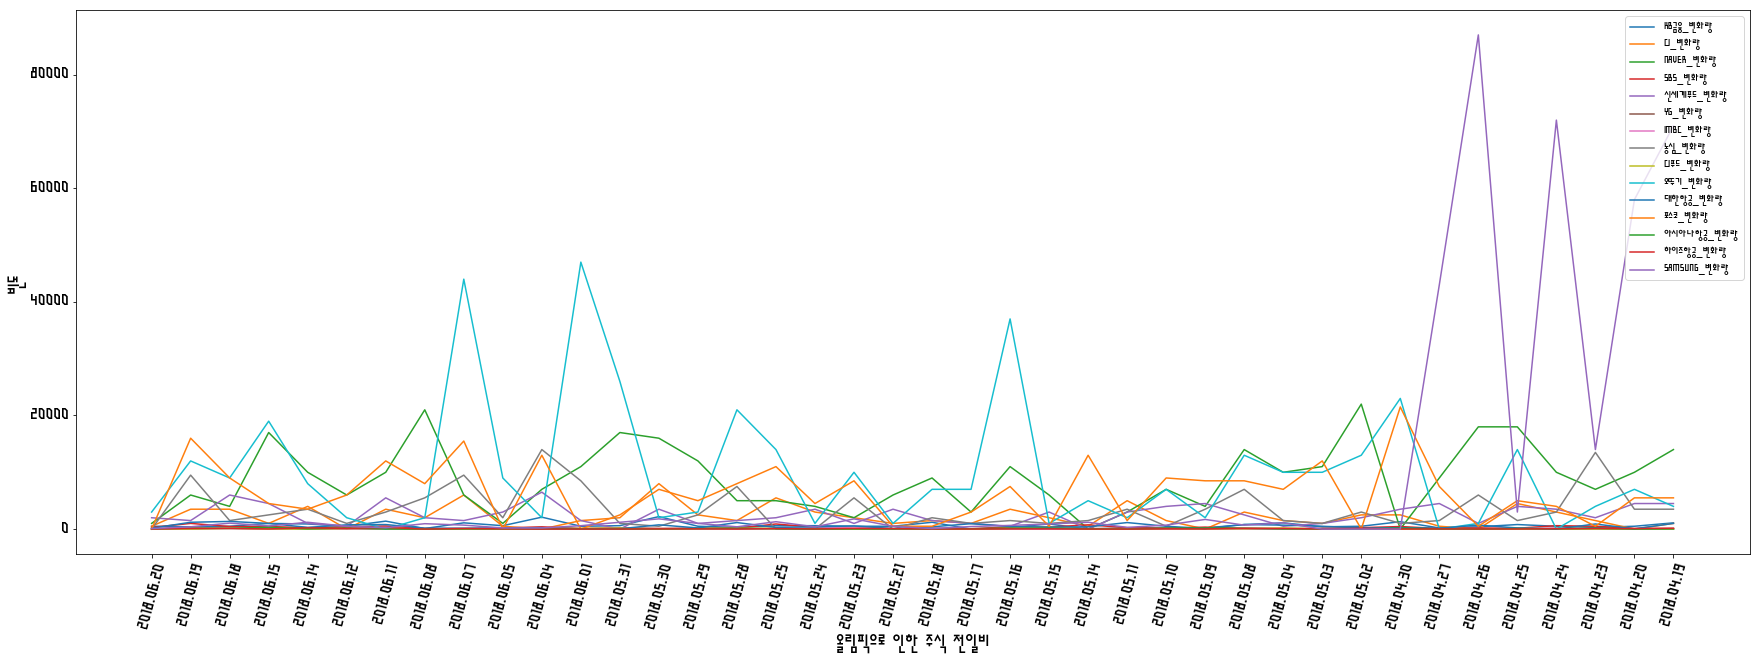

In [34]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["KB금융_변화량"])
plt.plot(sorted(Final.index,reverse=False), Final["CJ_변화량"])
plt.plot(sorted(Final.index,reverse=False), Final["NAVER_변화량"])
plt.plot(sorted(Final.index,reverse=False), Final["SBS_변화량"])
plt.plot(sorted(Final.index,reverse=False), Final["신세계푸드_변화량"])
plt.plot(sorted(Final.index,reverse=False), Final["YG_변화량"])
plt.plot(sorted(Final.index,reverse=False), Final["IMBC_변화량"])
plt.plot(sorted(Final.index,reverse=False), Final["농심_변화량"])
plt.plot(sorted(Final.index,reverse=False), Final["CJ푸드_변화량"])
plt.plot(sorted(Final.index,reverse=False), Final["오뚜기_변화량"])
plt.plot(sorted(Final.index,reverse=False), Final["대한항공_변화량"])
plt.plot(sorted(Final.index,reverse=False), Final["포스코_변화량"])
plt.plot(sorted(Final.index,reverse=False), Final["아시아나항공_변화량"])
plt.plot(sorted(Final.index,reverse=False), Final["하이즈항공_변화량"])
plt.plot(sorted(Final.index,reverse=False), Final["SAMSUNG_변화량"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('올림픽으로 인한 주식 전일비',fontsize=20) 
plt.ylabel('빈도',fontsize=20)
plt.legend(loc='upper right',fontsize=12)
plt.show()
# 올림픽으로 인한 주식 전일비

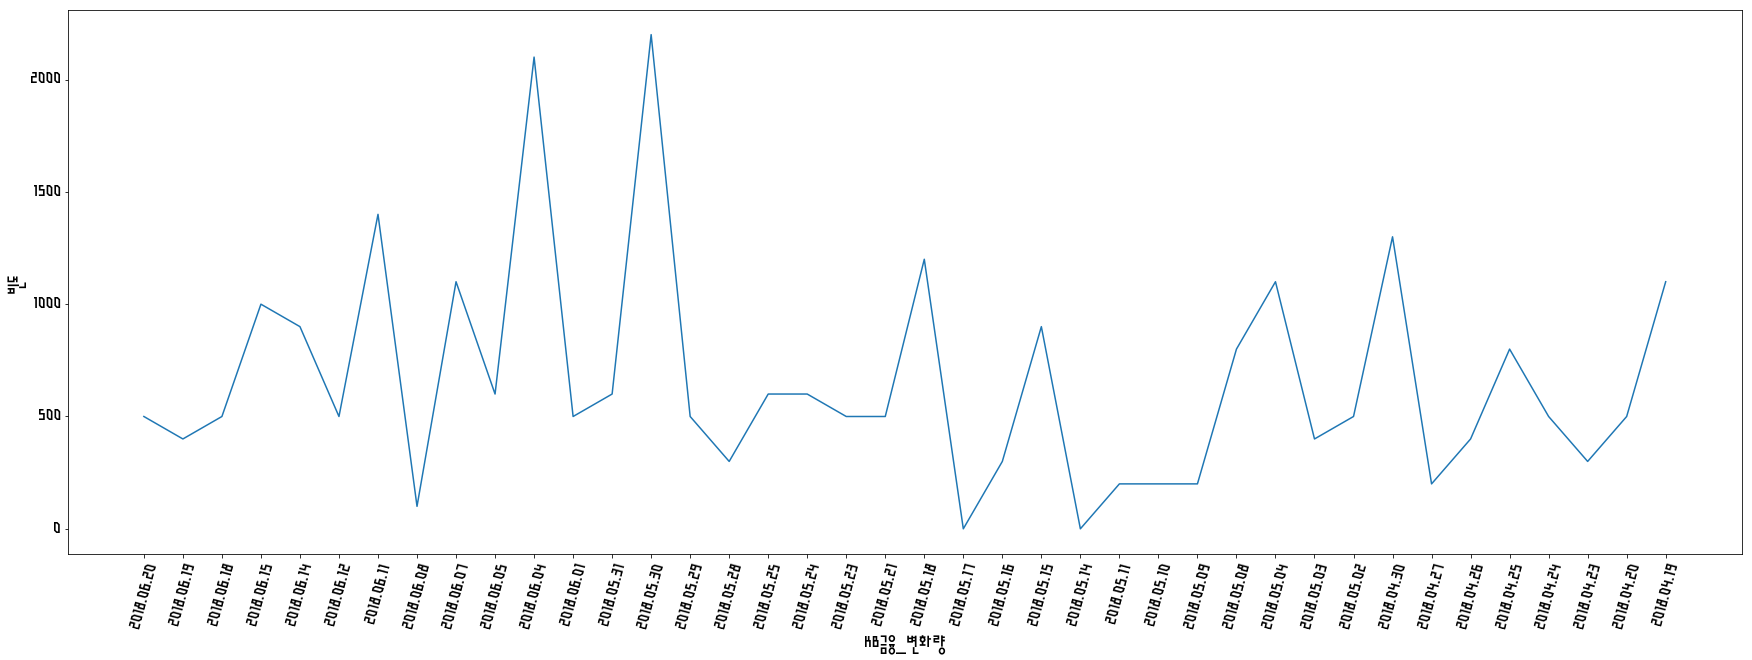

In [35]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
# plt.plot(sorted(Final.index,reverse=False), Final["KB금융_수익"])
plt.plot(sorted(Final.index,reverse=False), Final["KB금융_변화량"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('KB금융_변화량',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# KB금융_전일비에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다.
# 다른 기업의 주식도 위와 같은 코드로 진행한다. 

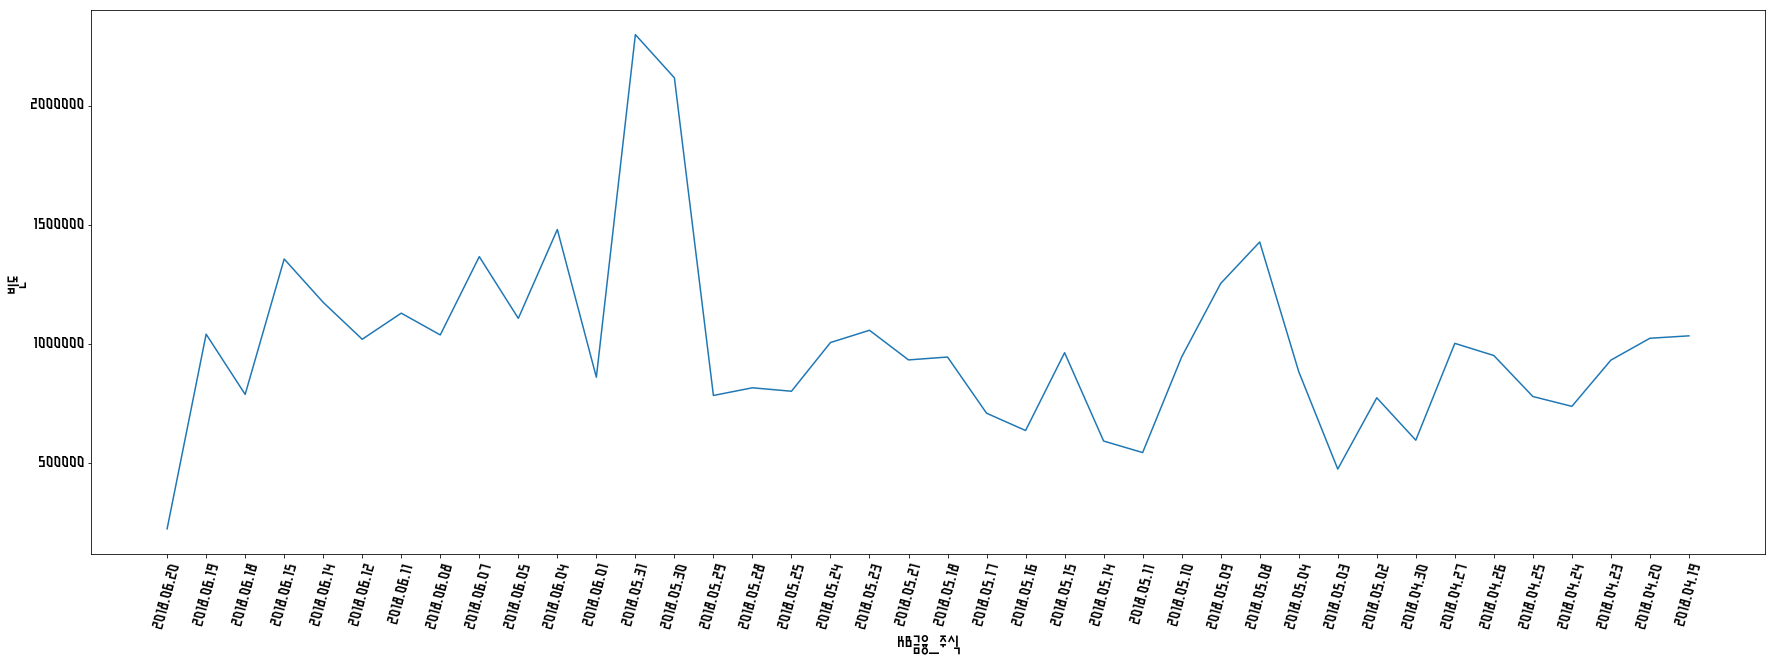

In [36]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["KB금융_수익"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('KB금융_주식',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# KB금융_주식에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

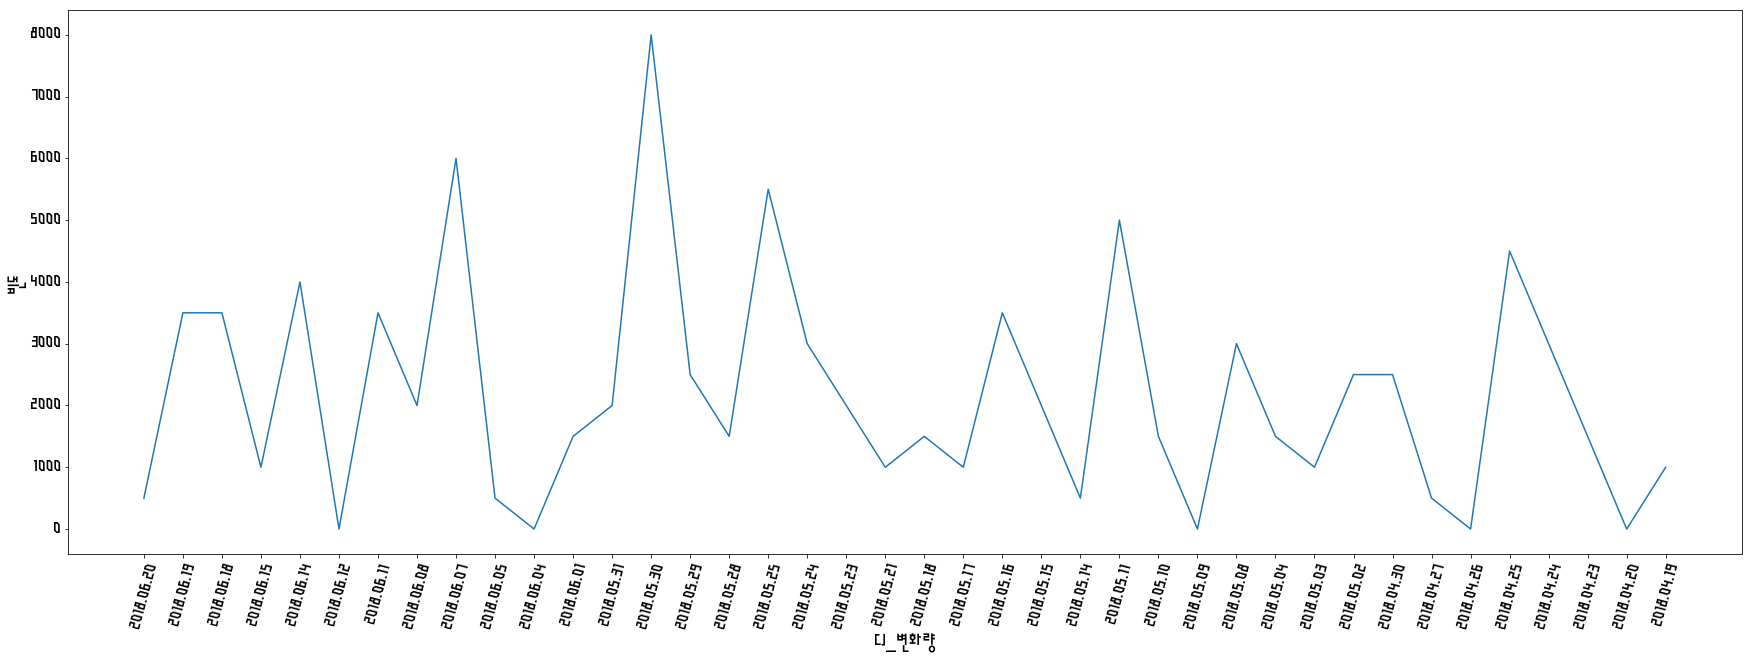

In [37]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["CJ_변화량"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('CJ_변화량',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# CJ_전일비에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

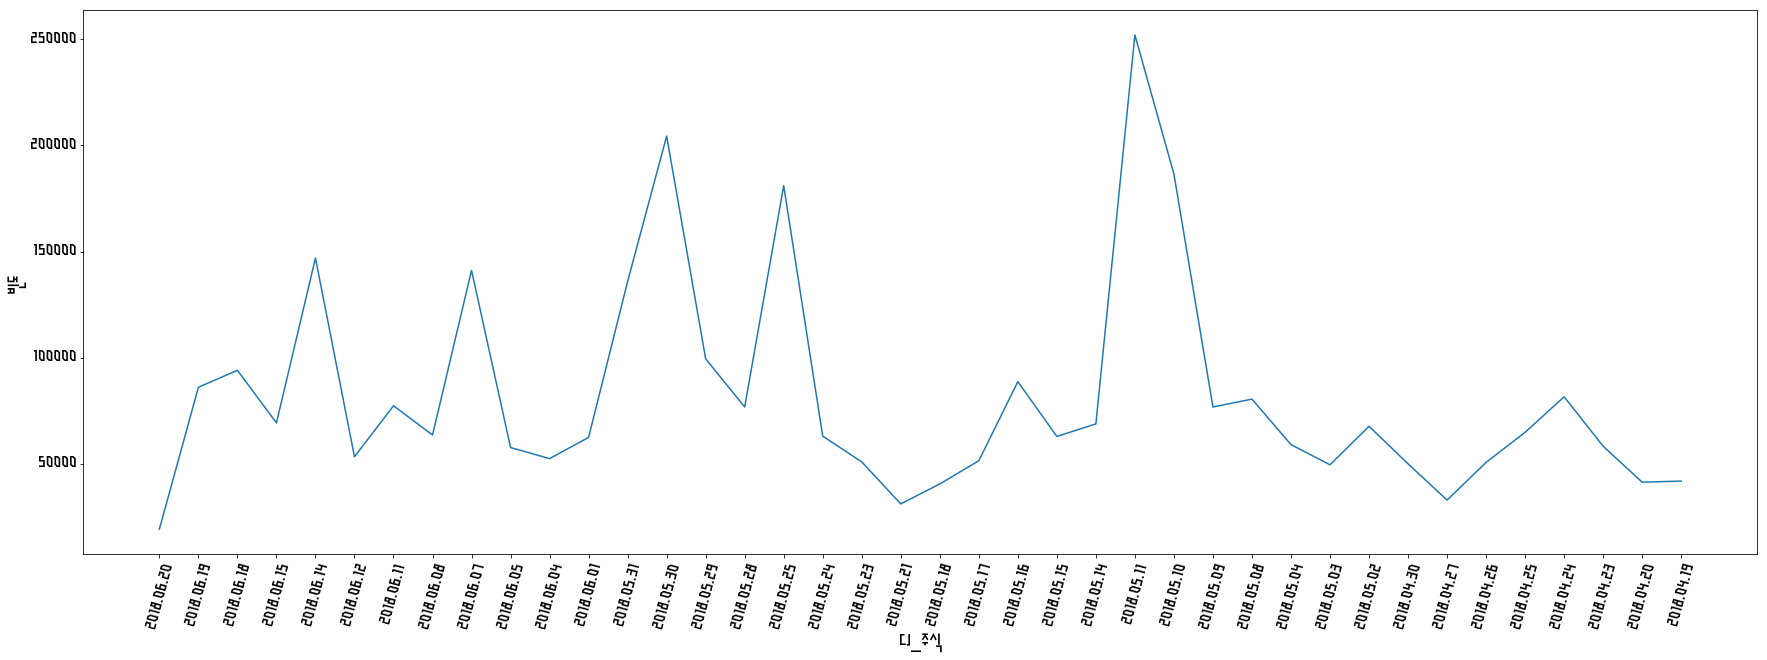

In [38]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["CJ_수익"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('CJ_주식',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# CJ_주식에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

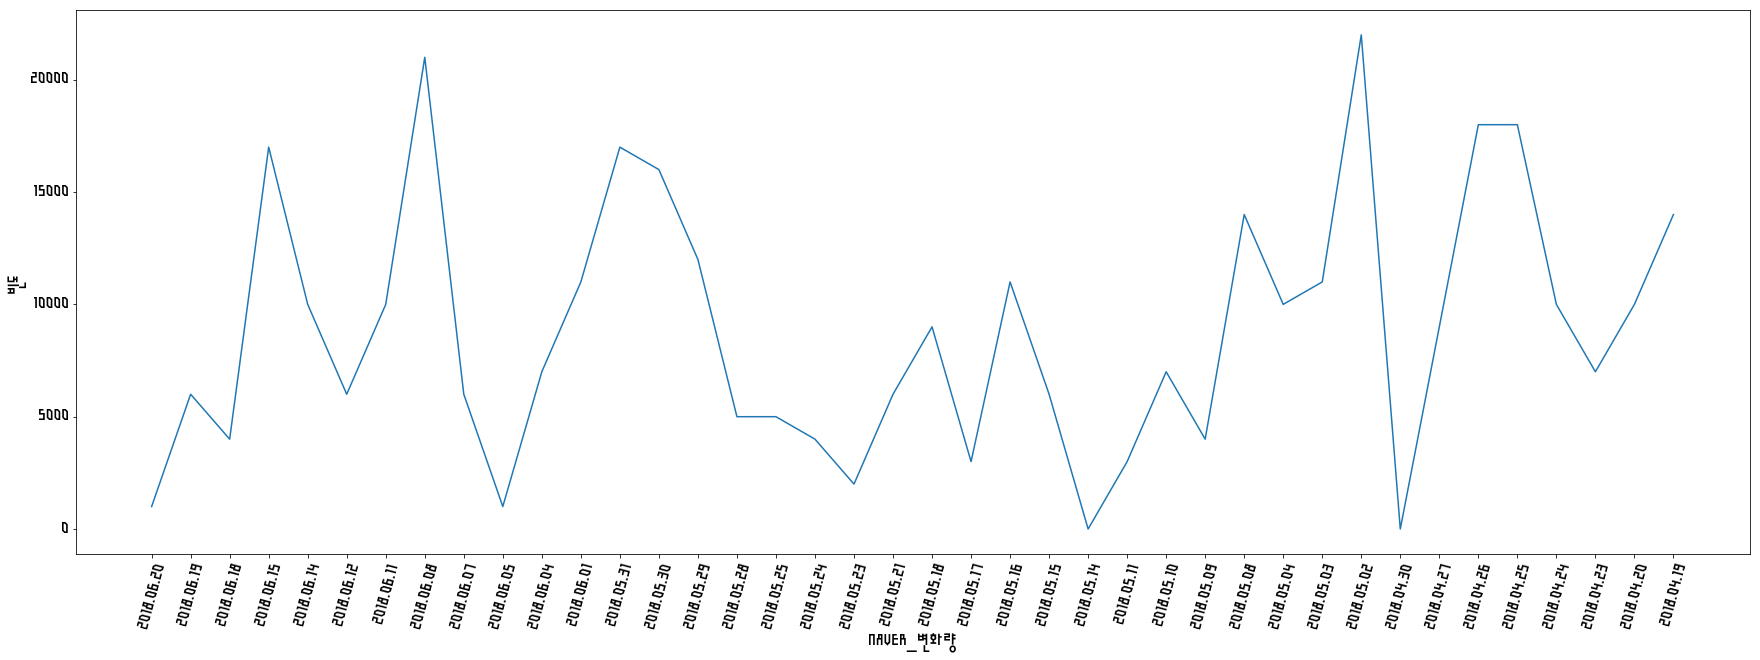

In [39]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["NAVER_변화량"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('NAVER_변화량',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# NAVER_수익에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

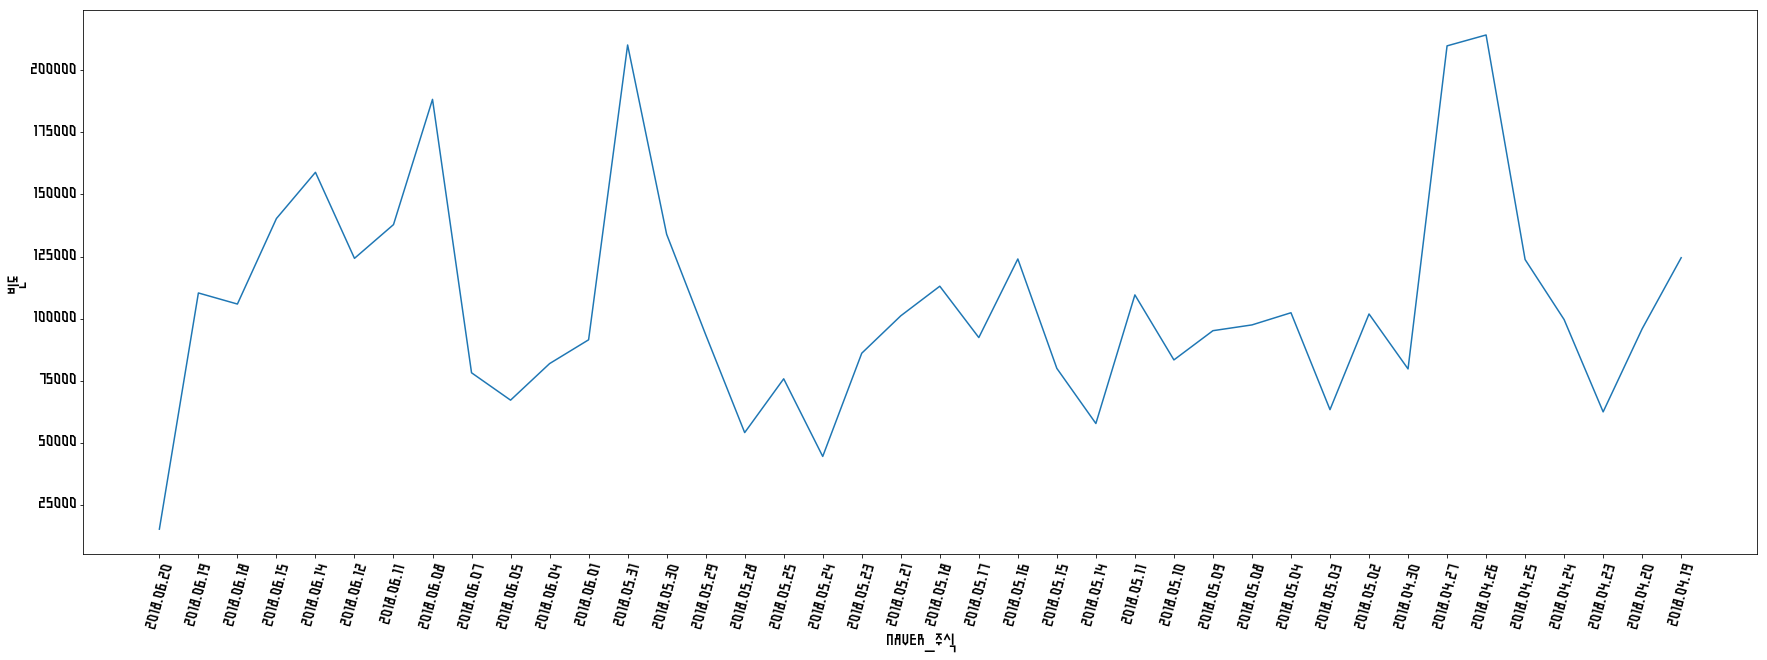

In [40]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["NAVER_수익"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('NAVER_주식',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# NAVER_주식에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

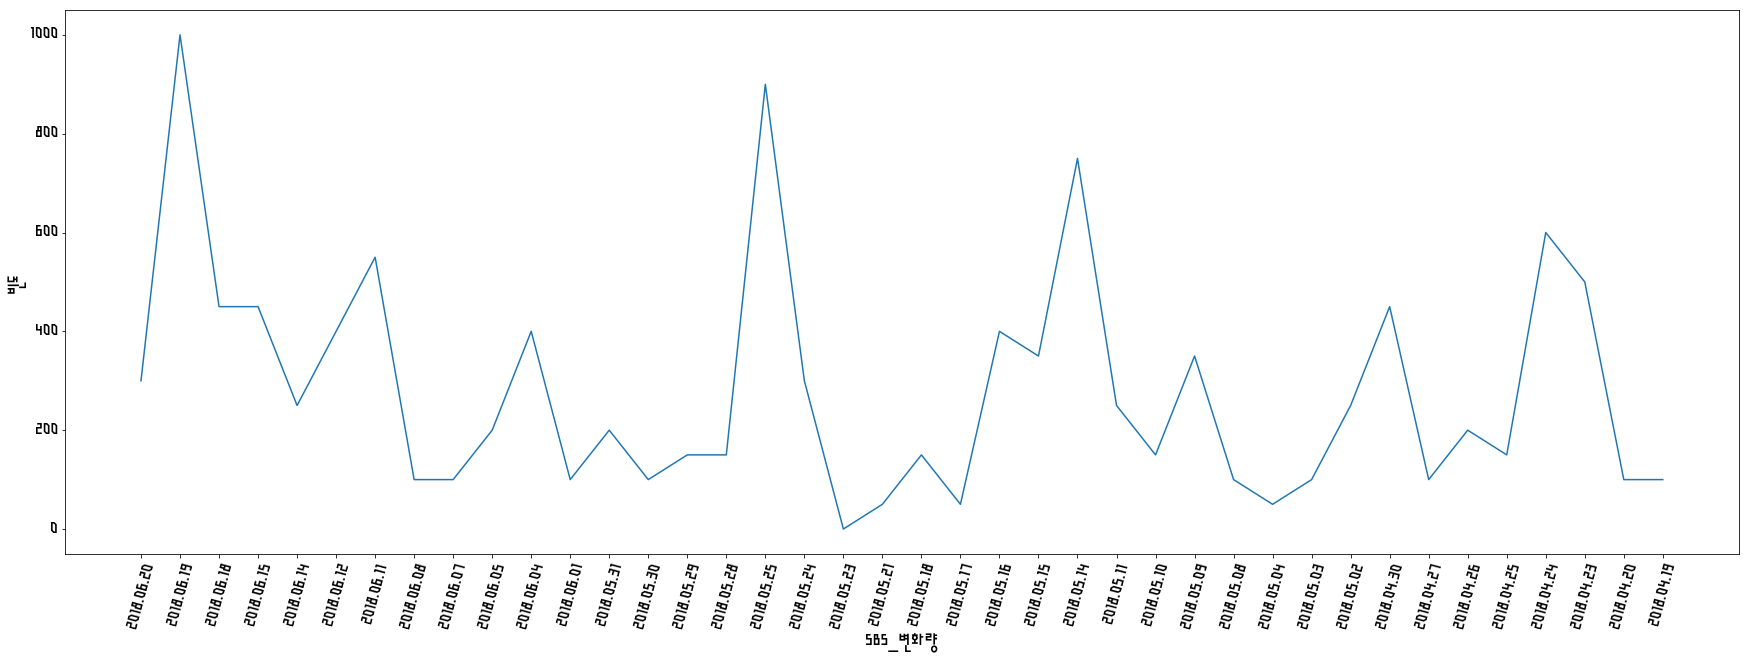

In [41]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["SBS_변화량"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('SBS_변화량',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# SBS_수익에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

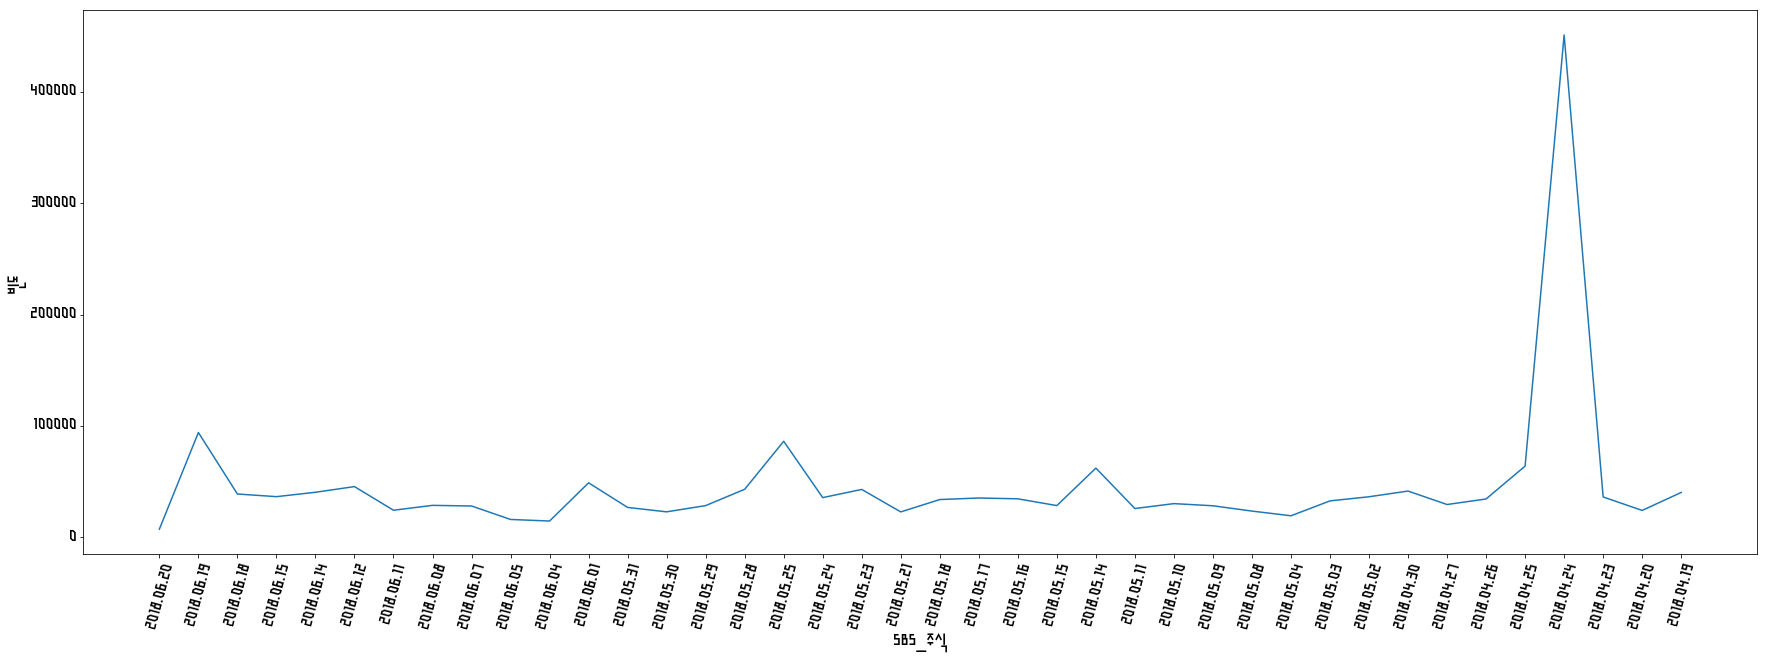

In [42]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["SBS_수익"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('SBS_주식',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# NAVER_주식에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

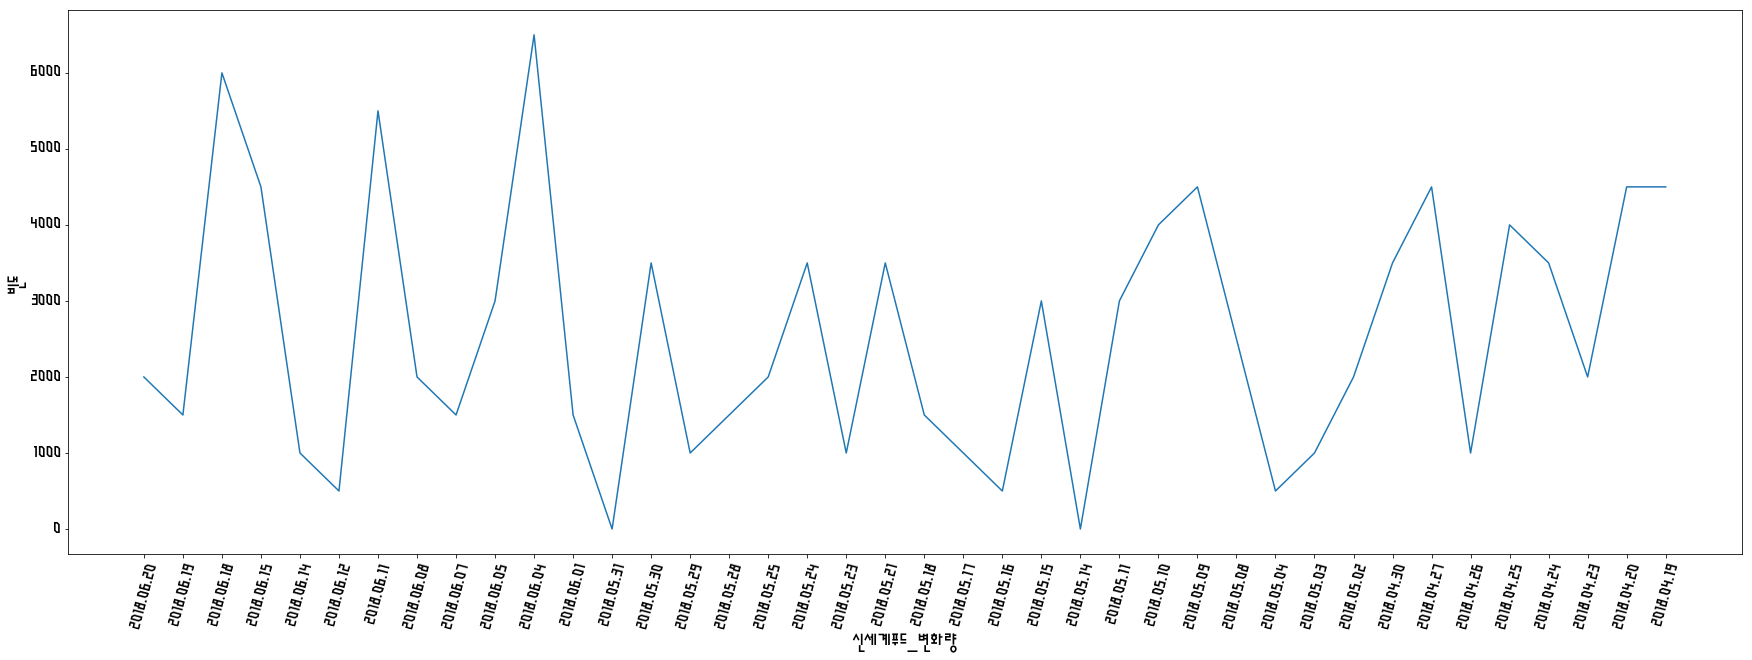

In [43]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["신세계푸드_변화량"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('신세계푸드_변화량',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# 신세계푸드_변화량에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

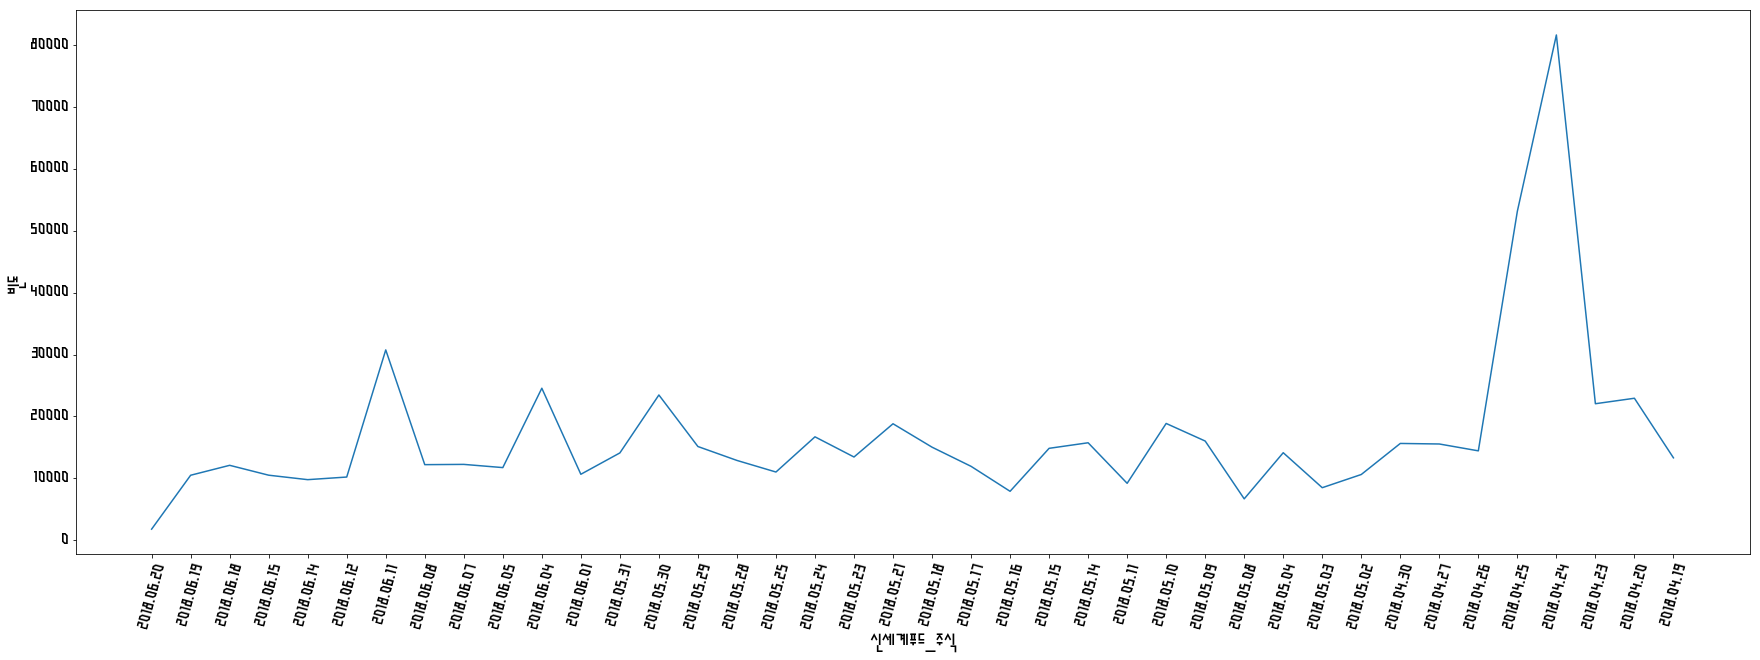

In [44]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["신세계푸드_수익"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('신세계푸드_주식',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# SBS_주식에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

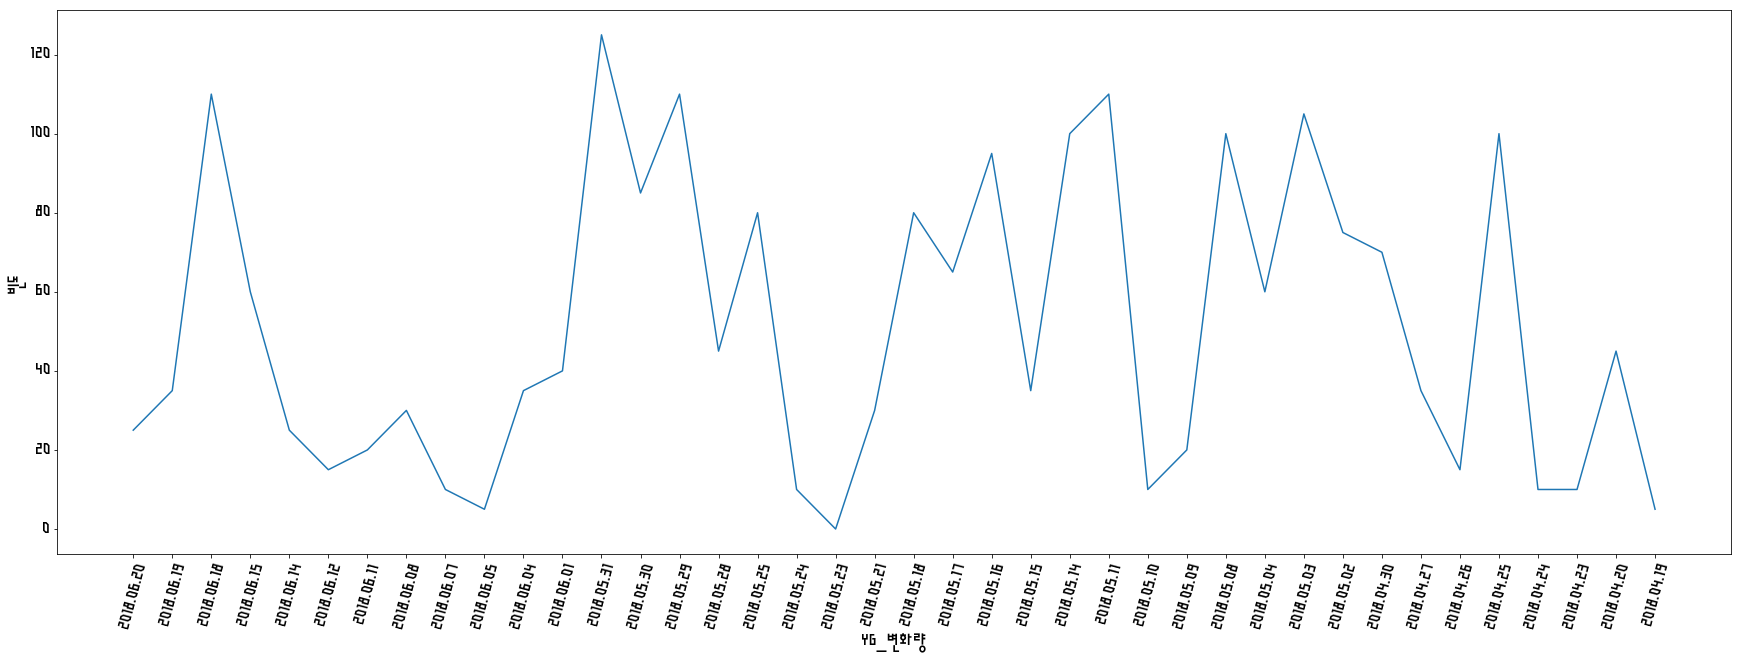

In [45]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["YG_변화량"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('YG_변화량',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# YG_plus변화량에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

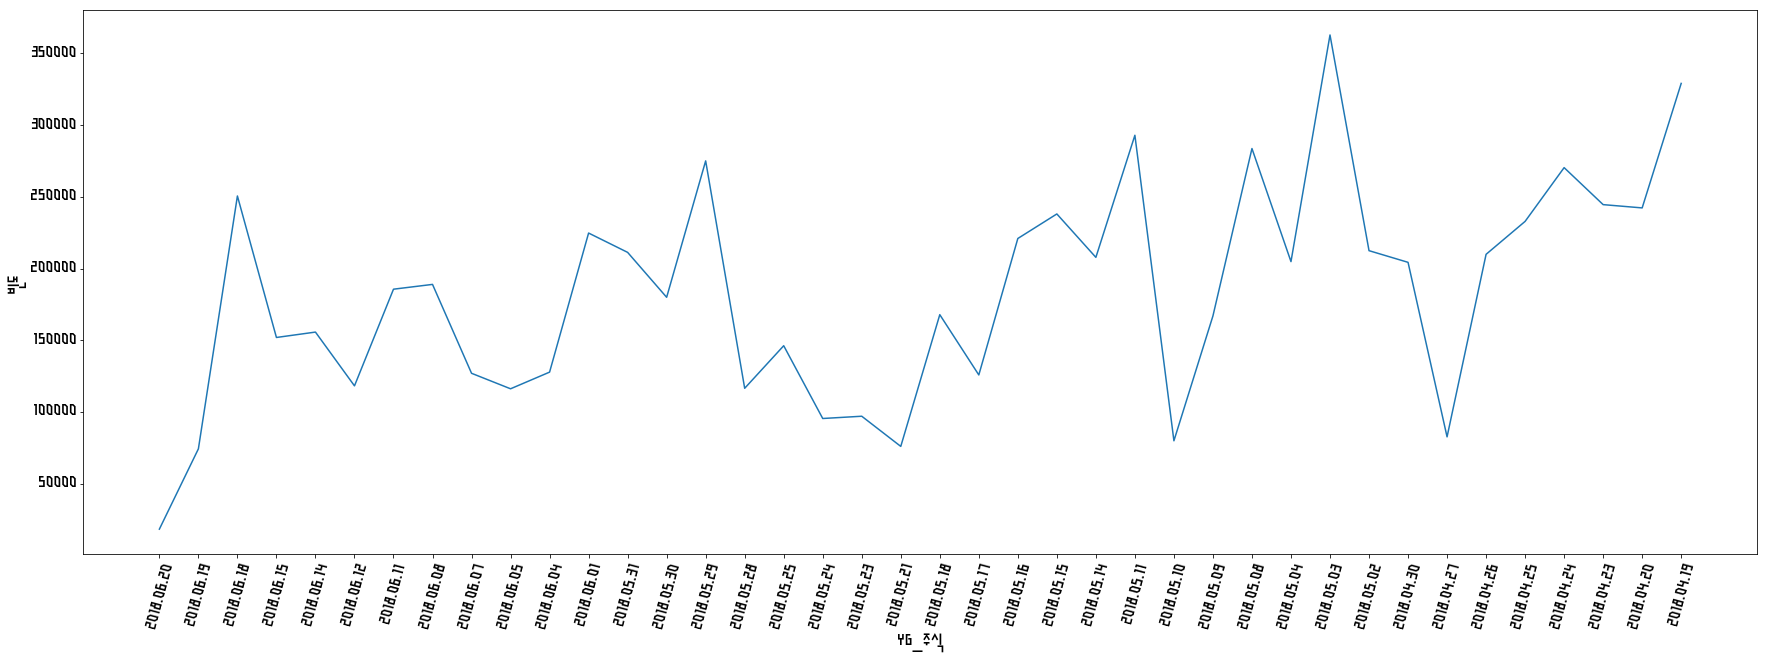

In [46]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["YG_수익"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('YG_주식',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# YG_주식에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

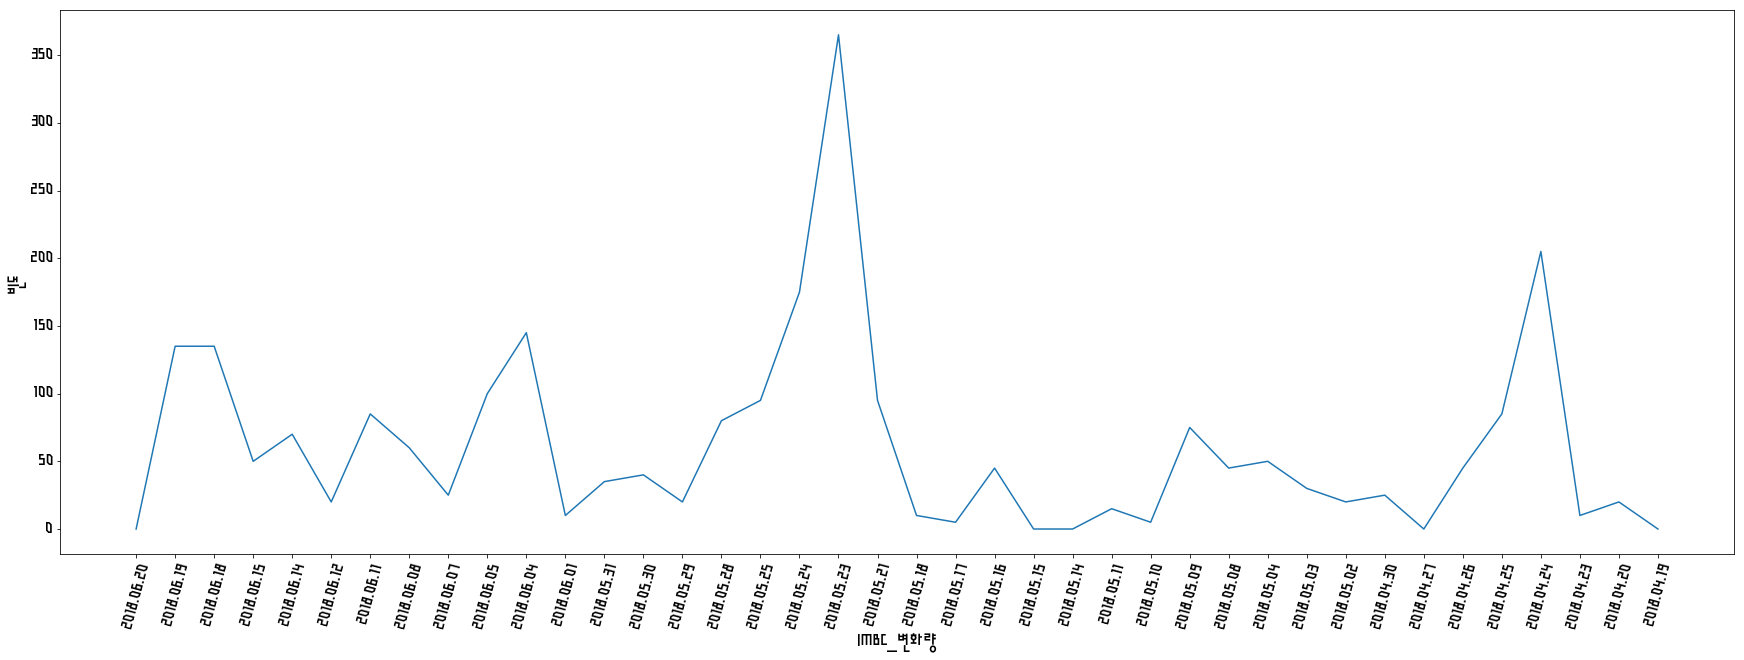

In [47]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["IMBC_변화량"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('IMBC_변화량',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# IMBC_plus변화량에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

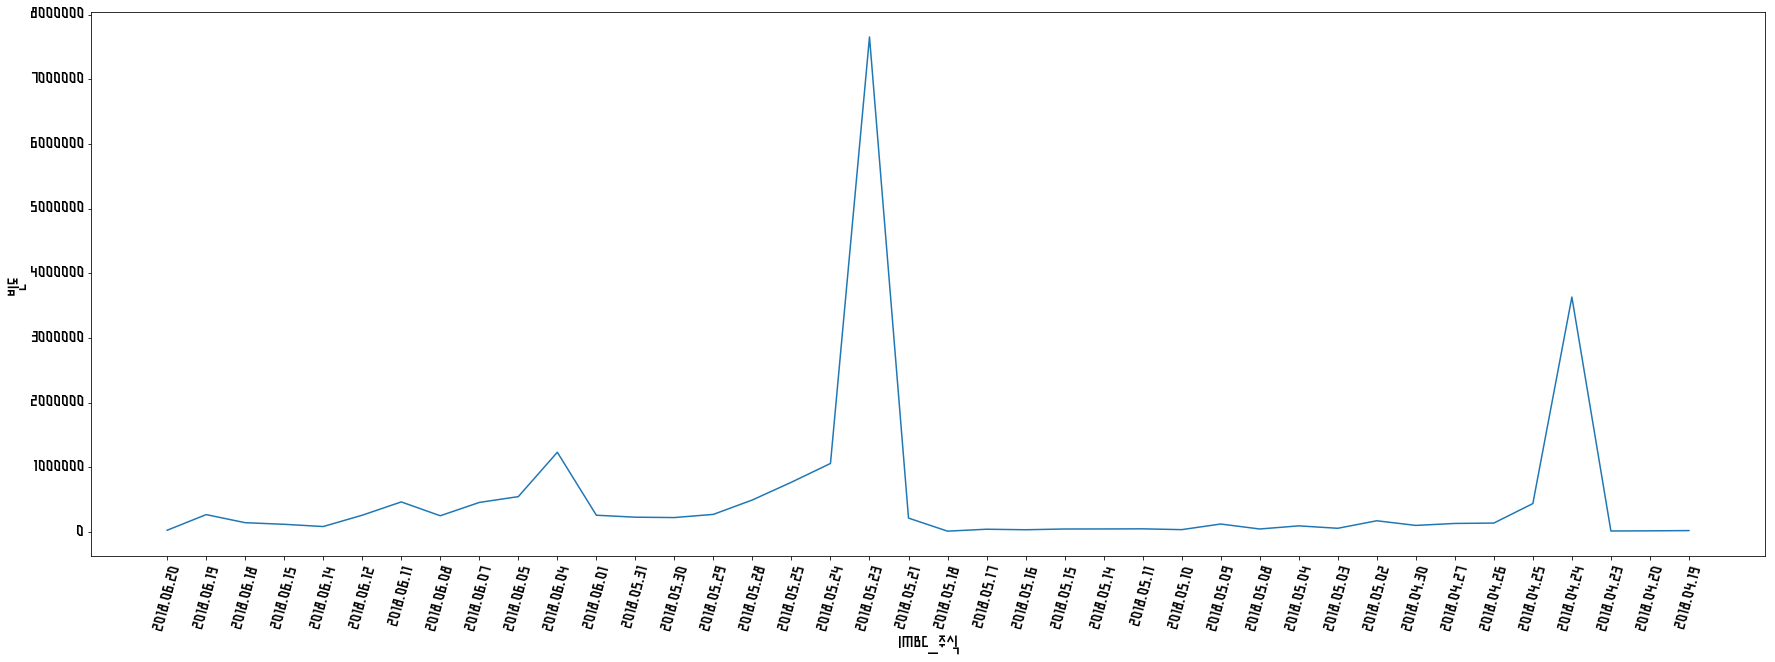

In [48]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["IMBC_수익"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('IMBC_주식',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# IMBC_주식에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. IMBC

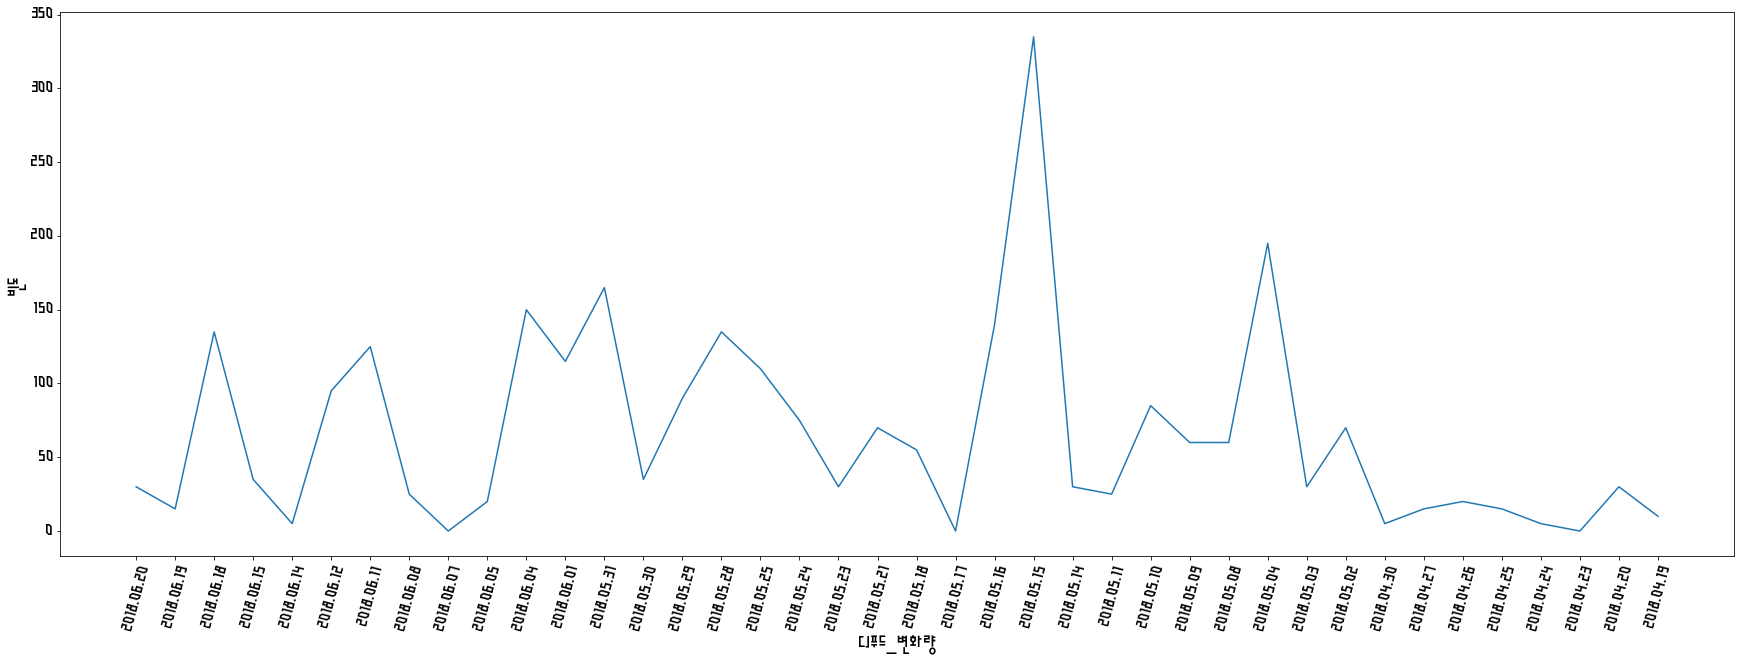

In [49]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["CJ푸드_변화량"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('CJ푸드_변화량',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# CJ푸드_변화량에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

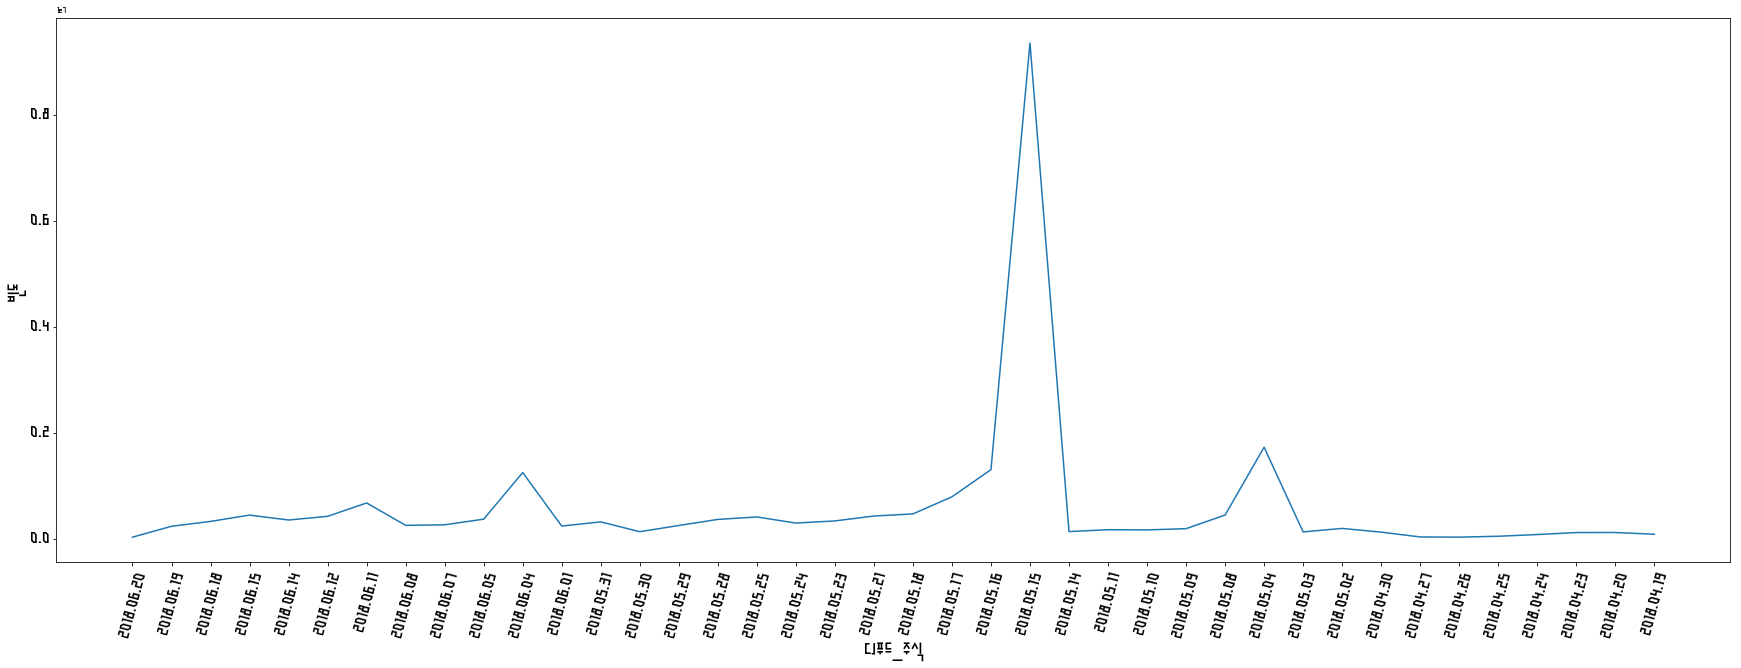

In [50]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["CJ푸드_수익"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('CJ푸드_주식',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# CJ푸드_주식에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. IMBC

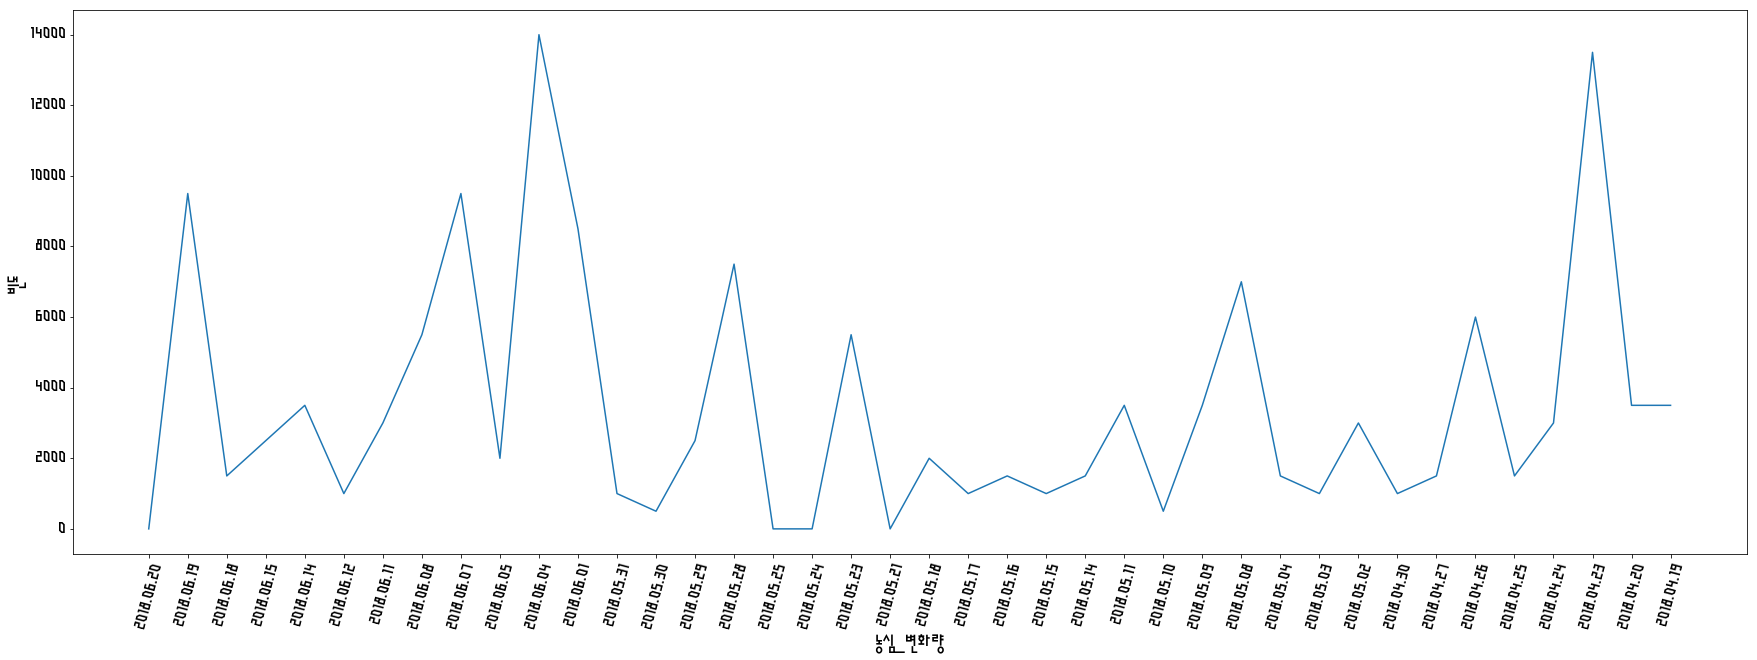

In [51]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["농심_변화량"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('농심_변화량',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# 농심_변화량에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

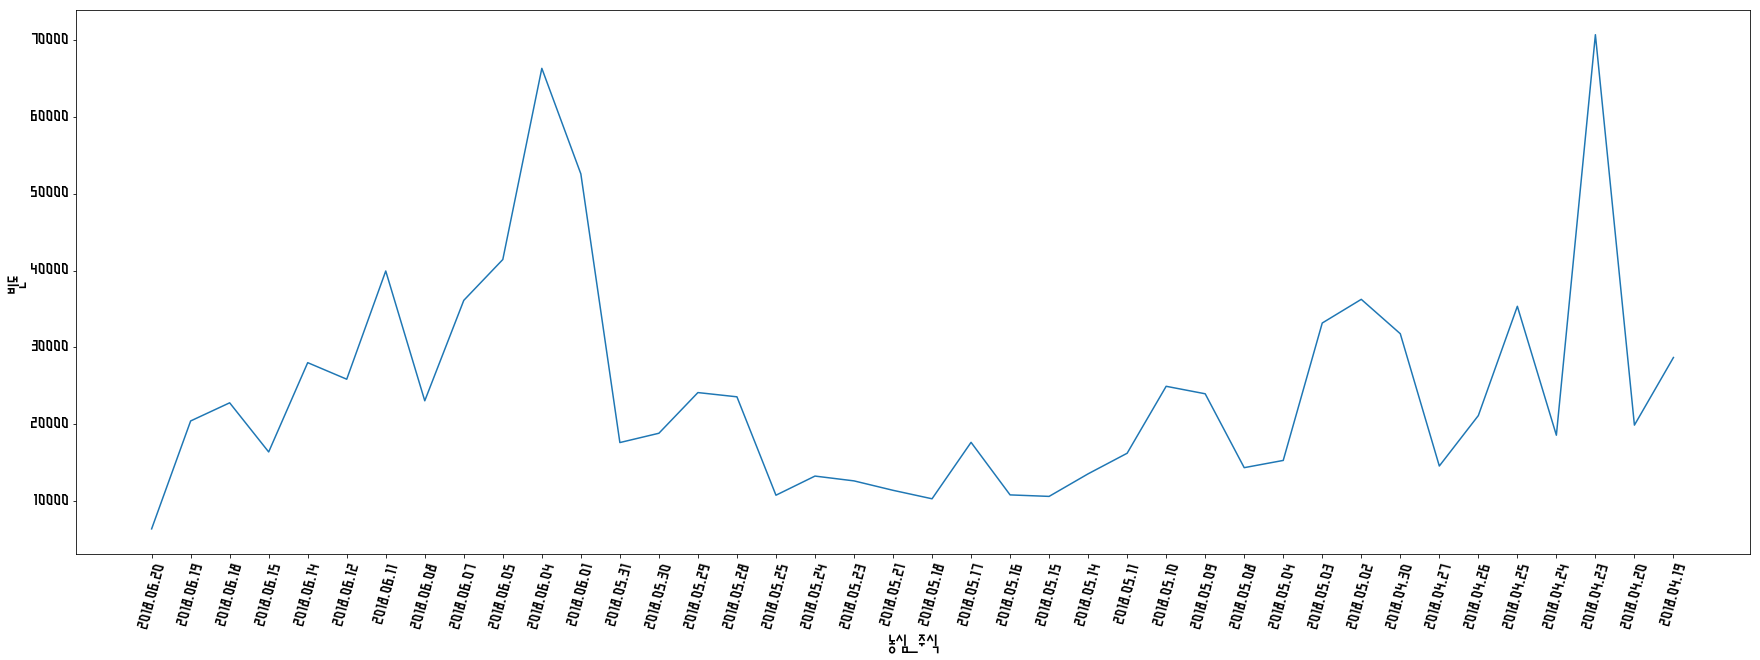

In [52]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["농심_수익"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('농심_주식',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# 농심_주식에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. IMBC

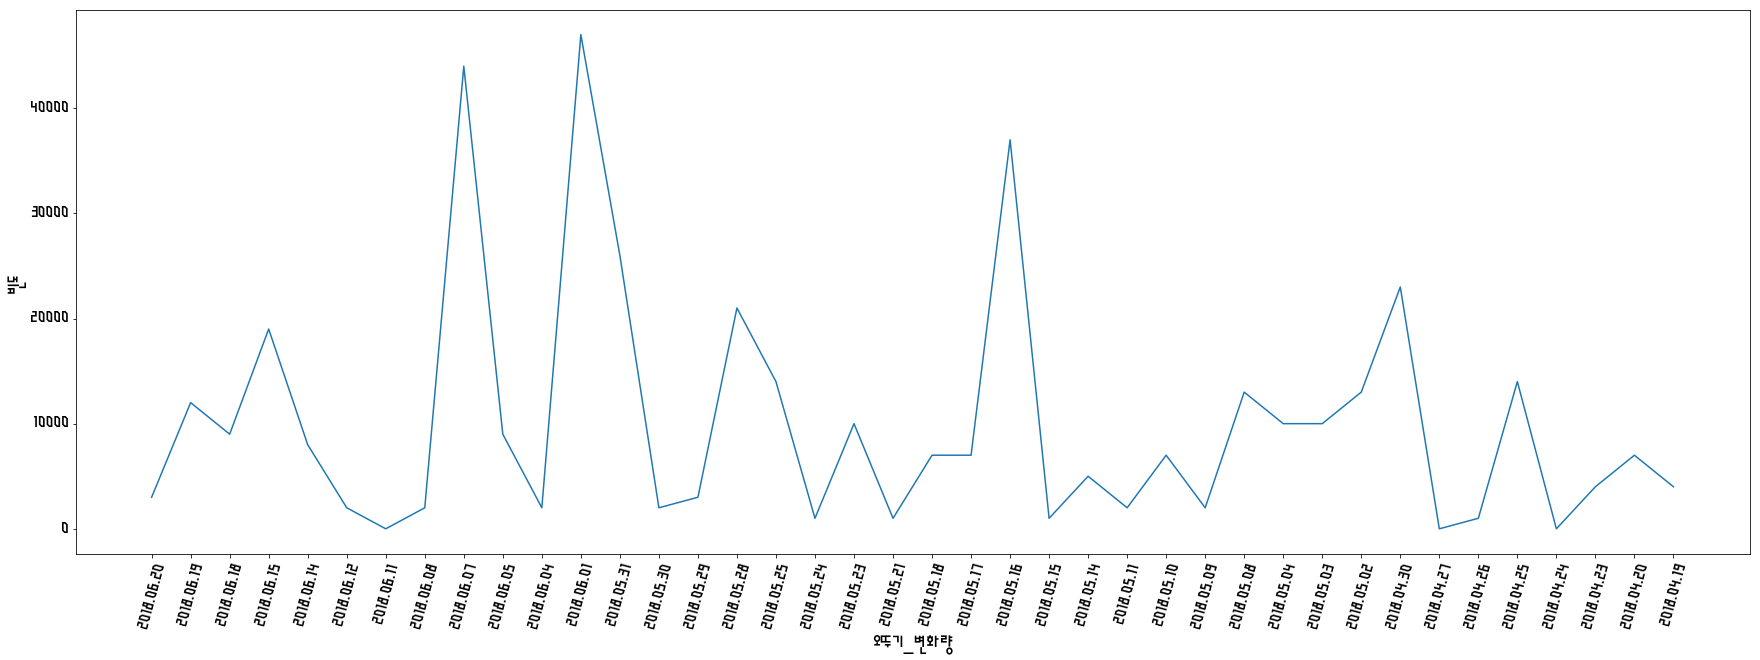

In [53]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["오뚜기_변화량"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('오뚜기_변화량',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# 오뚜기_변화량에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

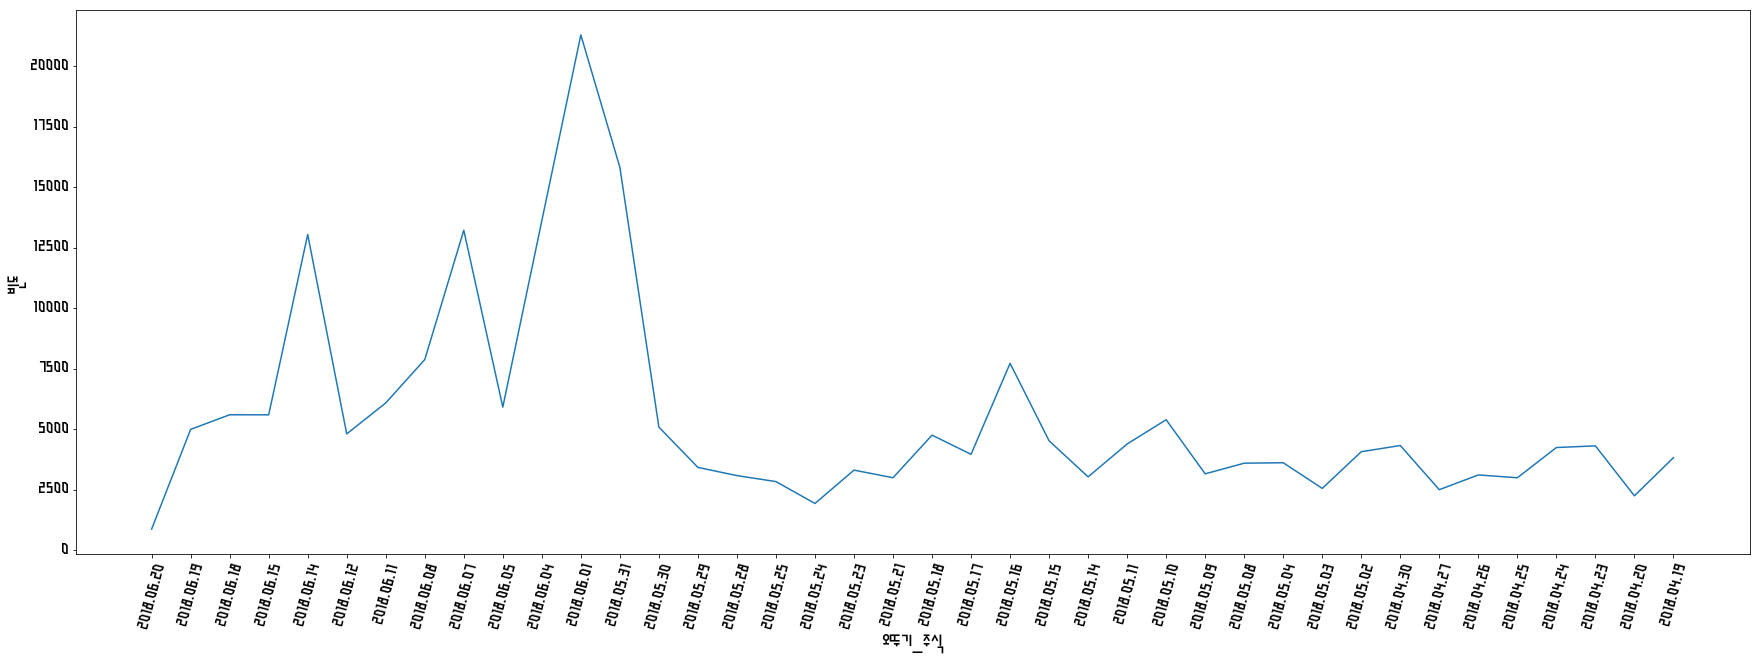

In [54]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["오뚜기_수익"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('오뚜기_주식',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# 오뚜기_주식에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. IMBC

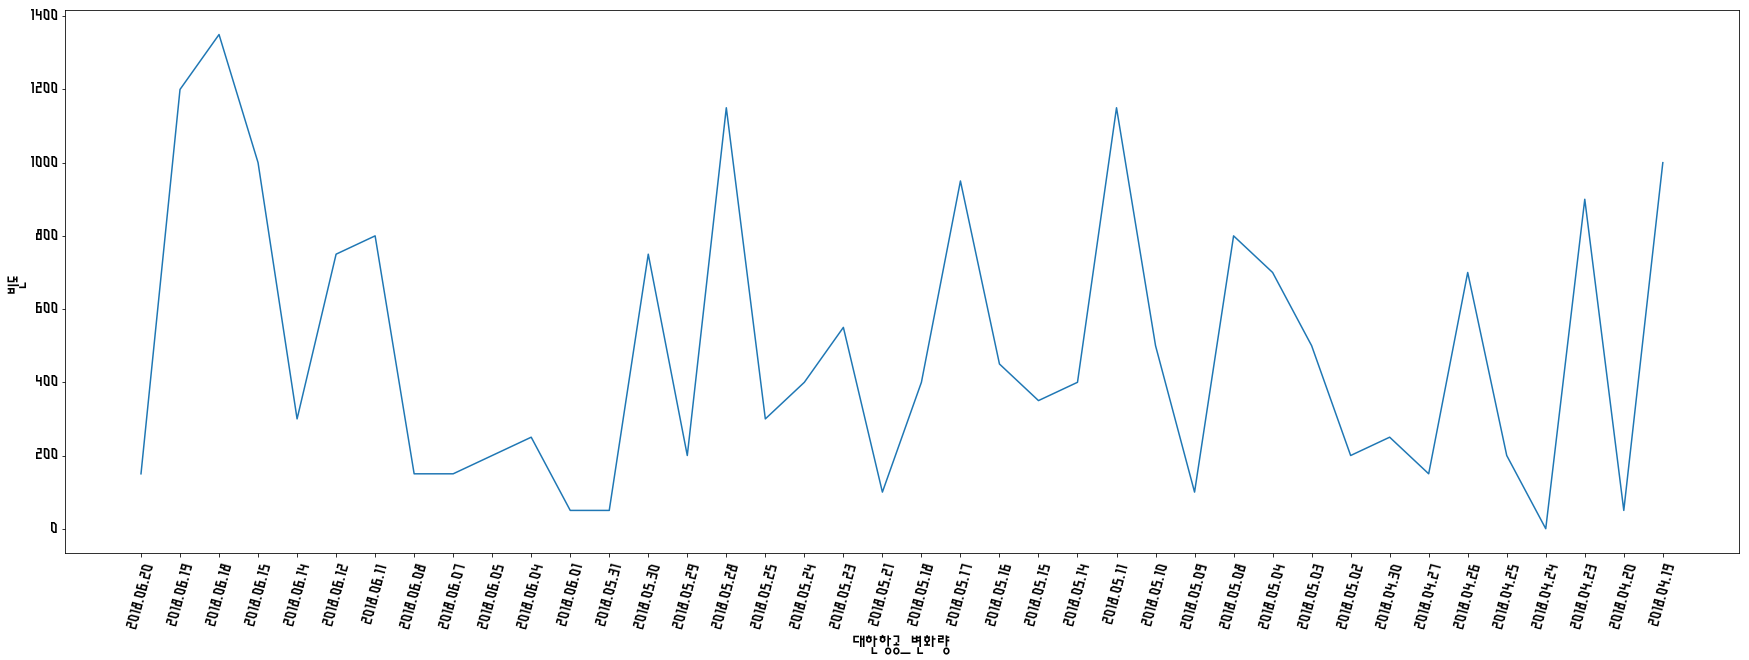

In [55]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["대한항공_변화량"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('대한항공_변화량',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# 대한항공_변화량에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

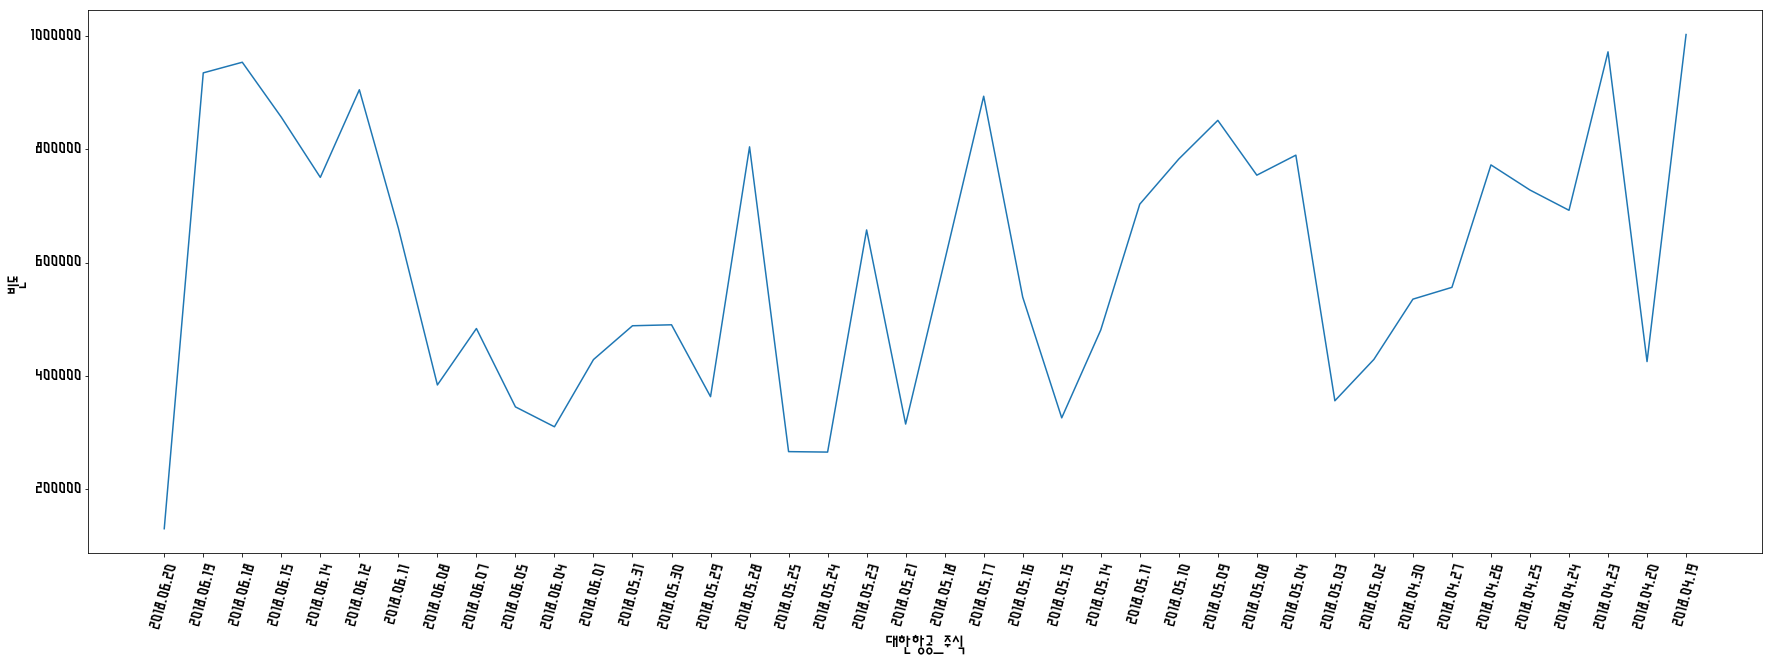

In [56]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["대한항공_수익"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('대한항공_주식',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# 대한항공_주식에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. IMBC

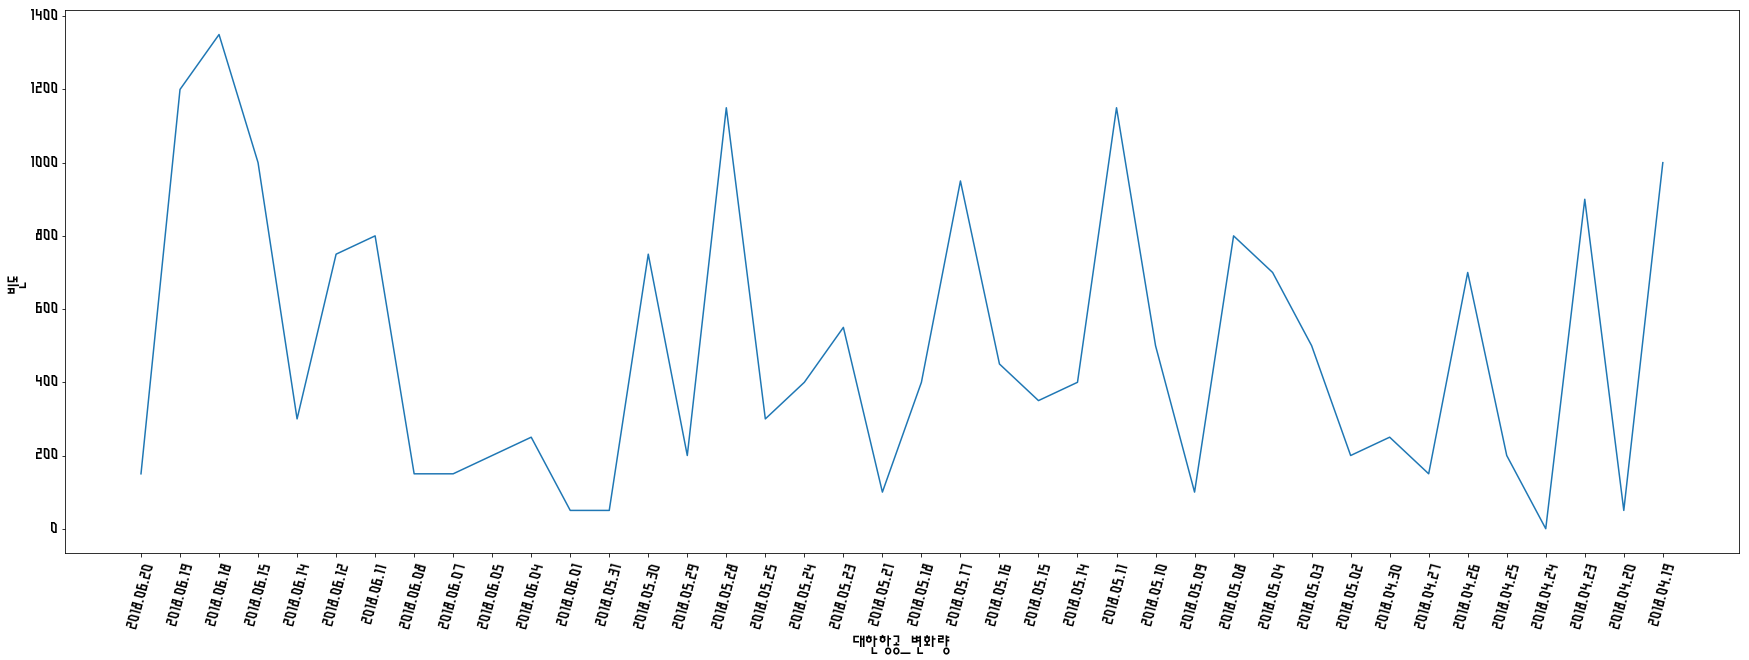

In [57]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["대한항공_변화량"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('대한항공_변화량',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# 대한항공_변화량에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

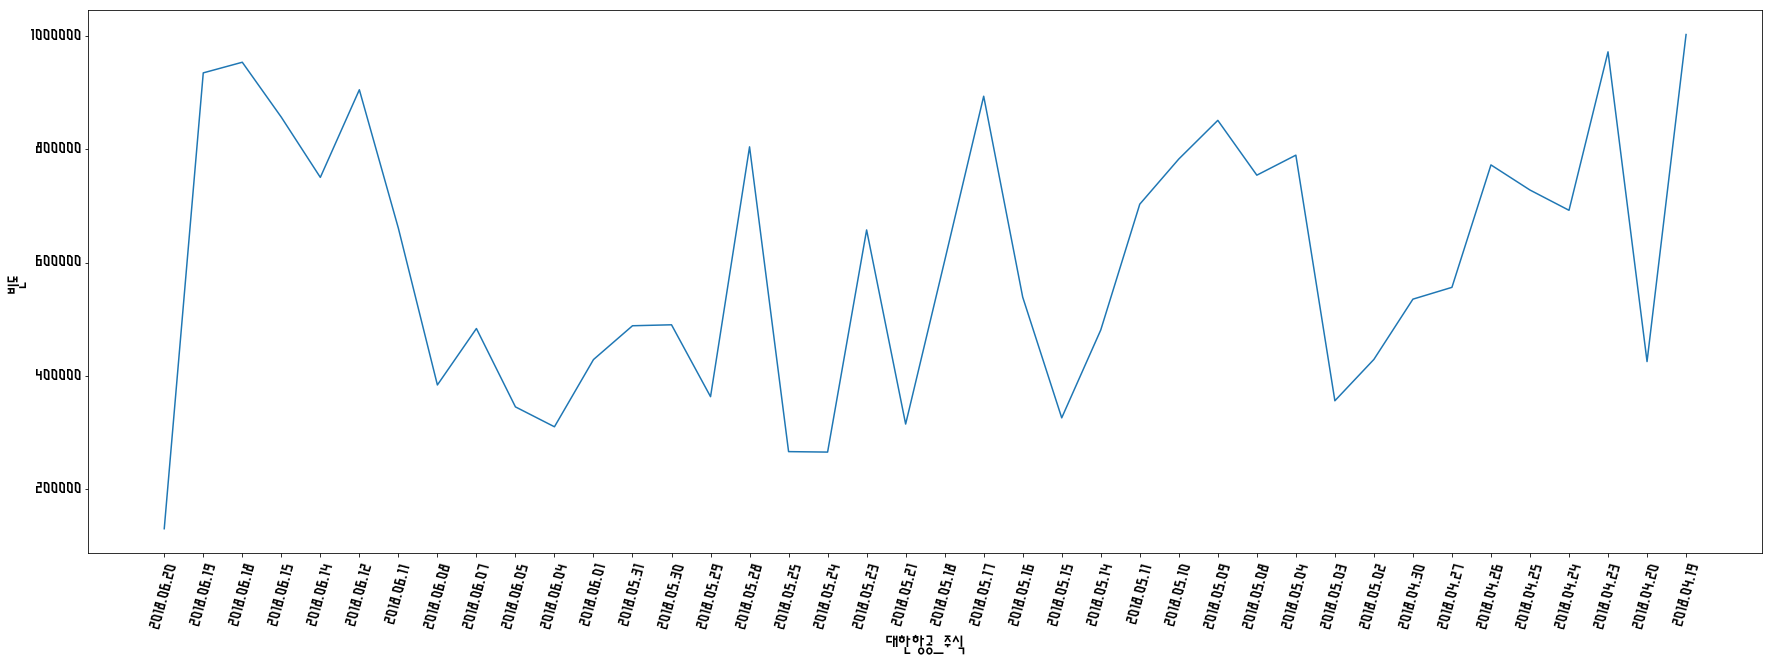

In [58]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["대한항공_수익"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('대한항공_주식',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# 대한항공_주식에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. IMBC

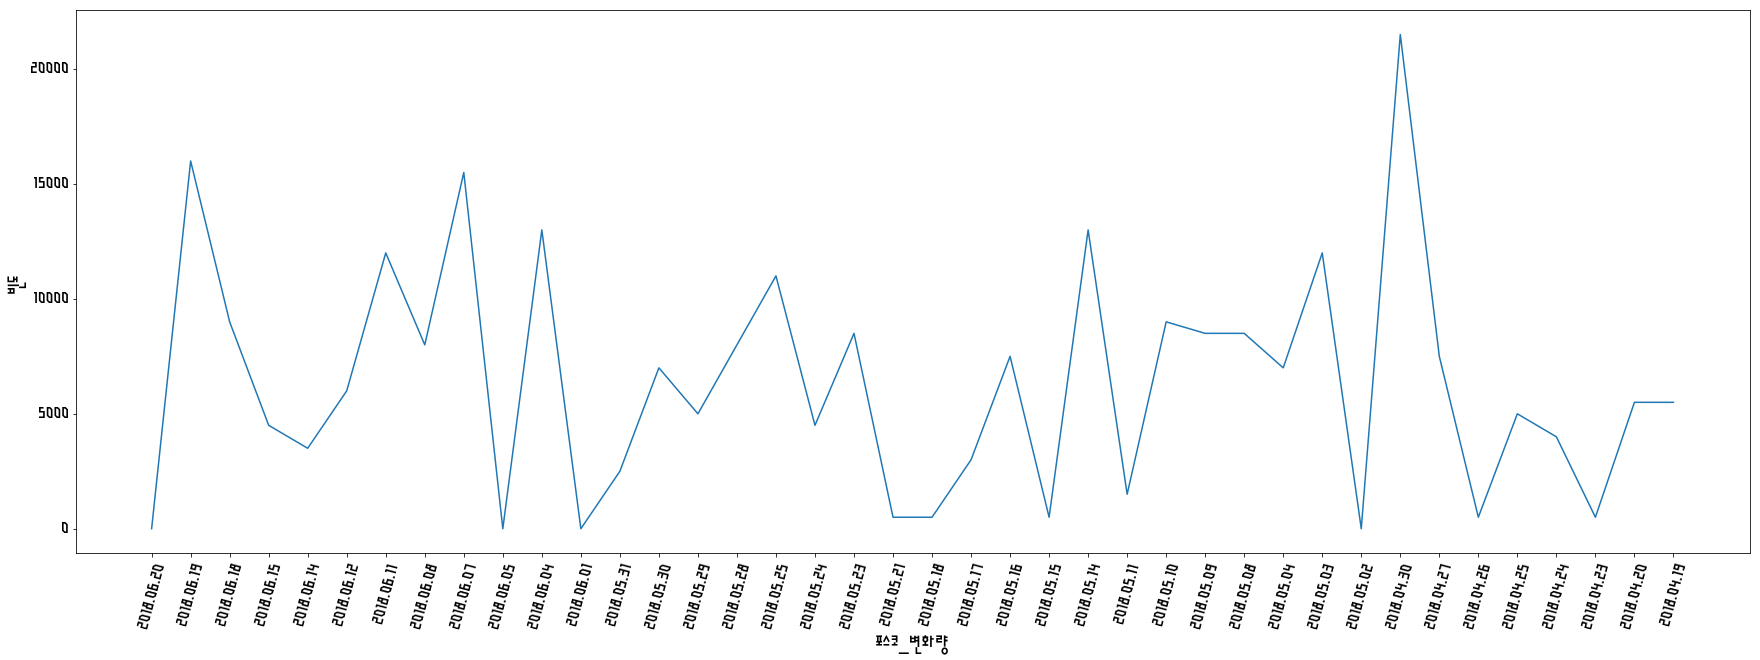

In [59]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["포스코_변화량"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('포스코_변화량',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# 포스코_변화량에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

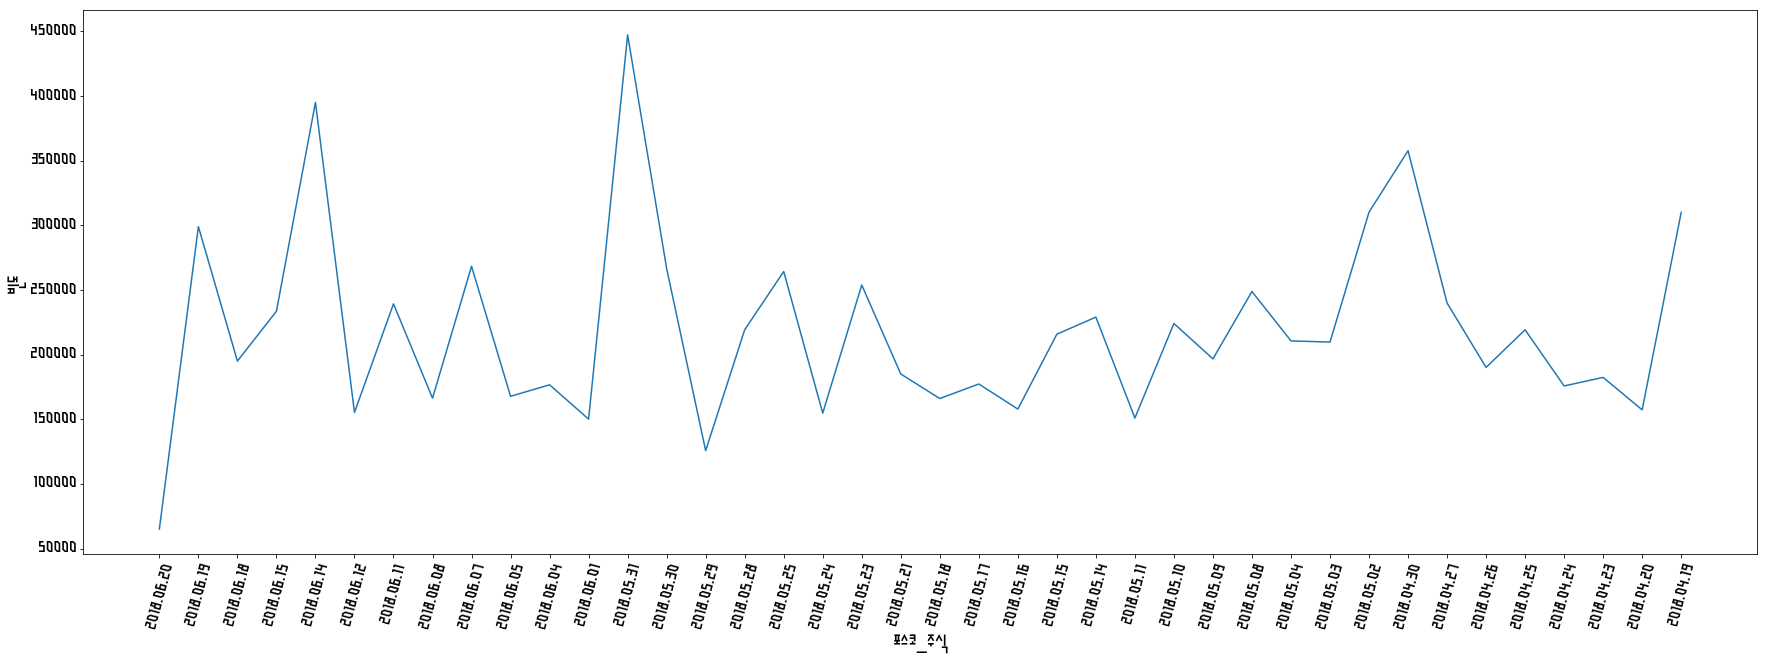

In [60]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["포스코_수익"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('포스코_주식',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# 포스코_주식에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. IMBC

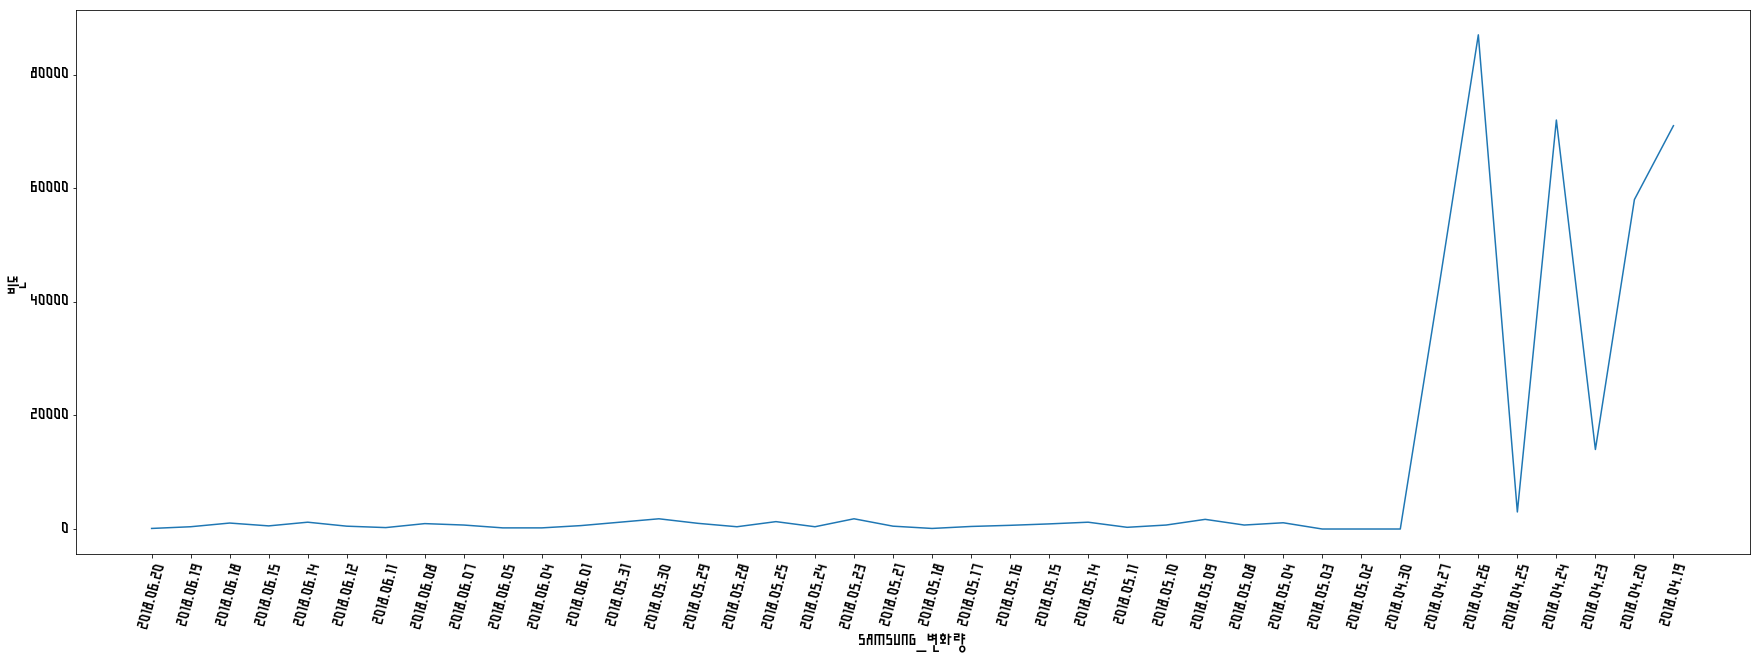

In [61]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["SAMSUNG_변화량"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('SAMSUNG_변화량',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# SAMSUNG_변화량에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

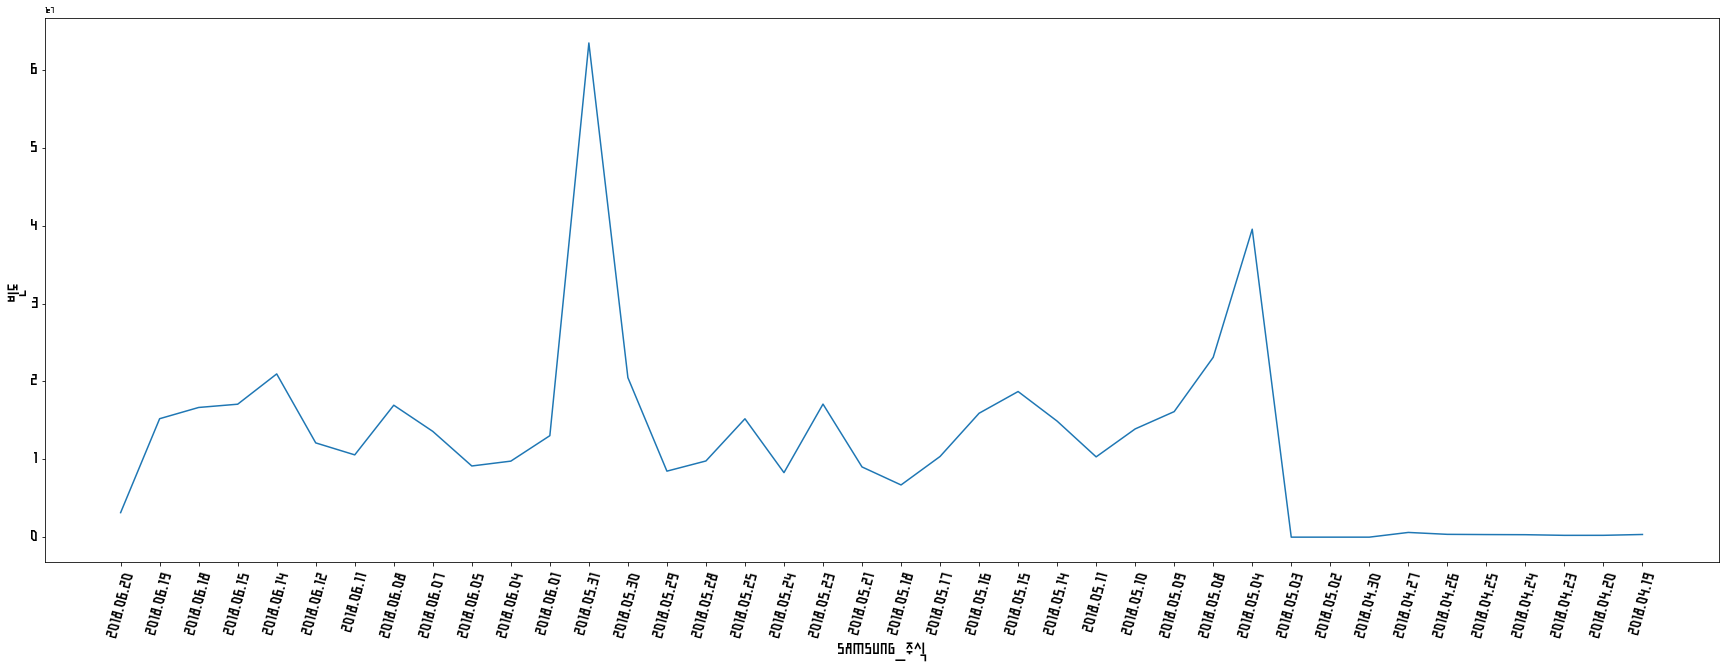

In [62]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["SAMSUNG_수익"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('SAMSUNG_주식',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# SAMSUNG_주식에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. IMBC

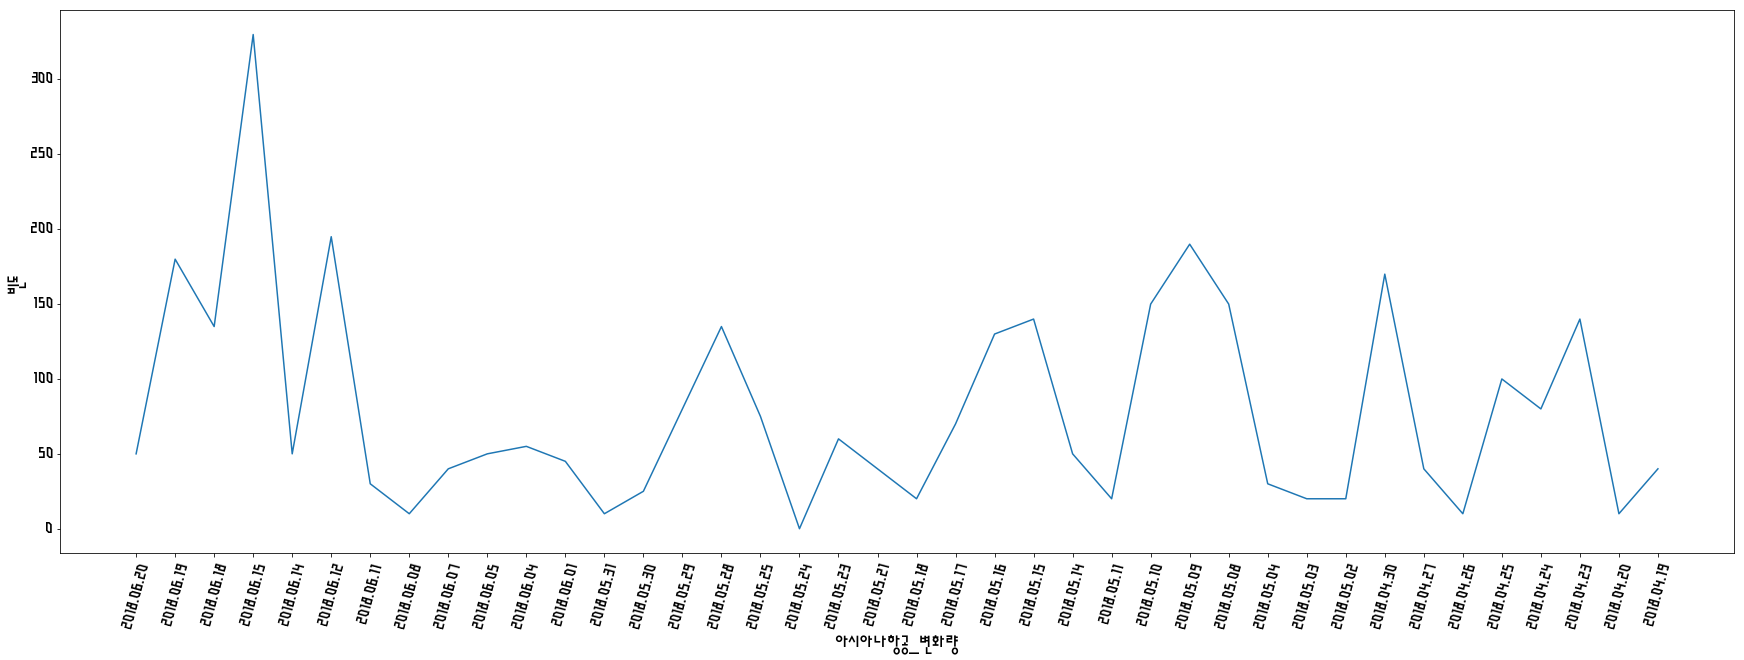

In [63]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["아시아나항공_변화량"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('아시아나항공_변화량',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# 아시아나항공_변화량에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

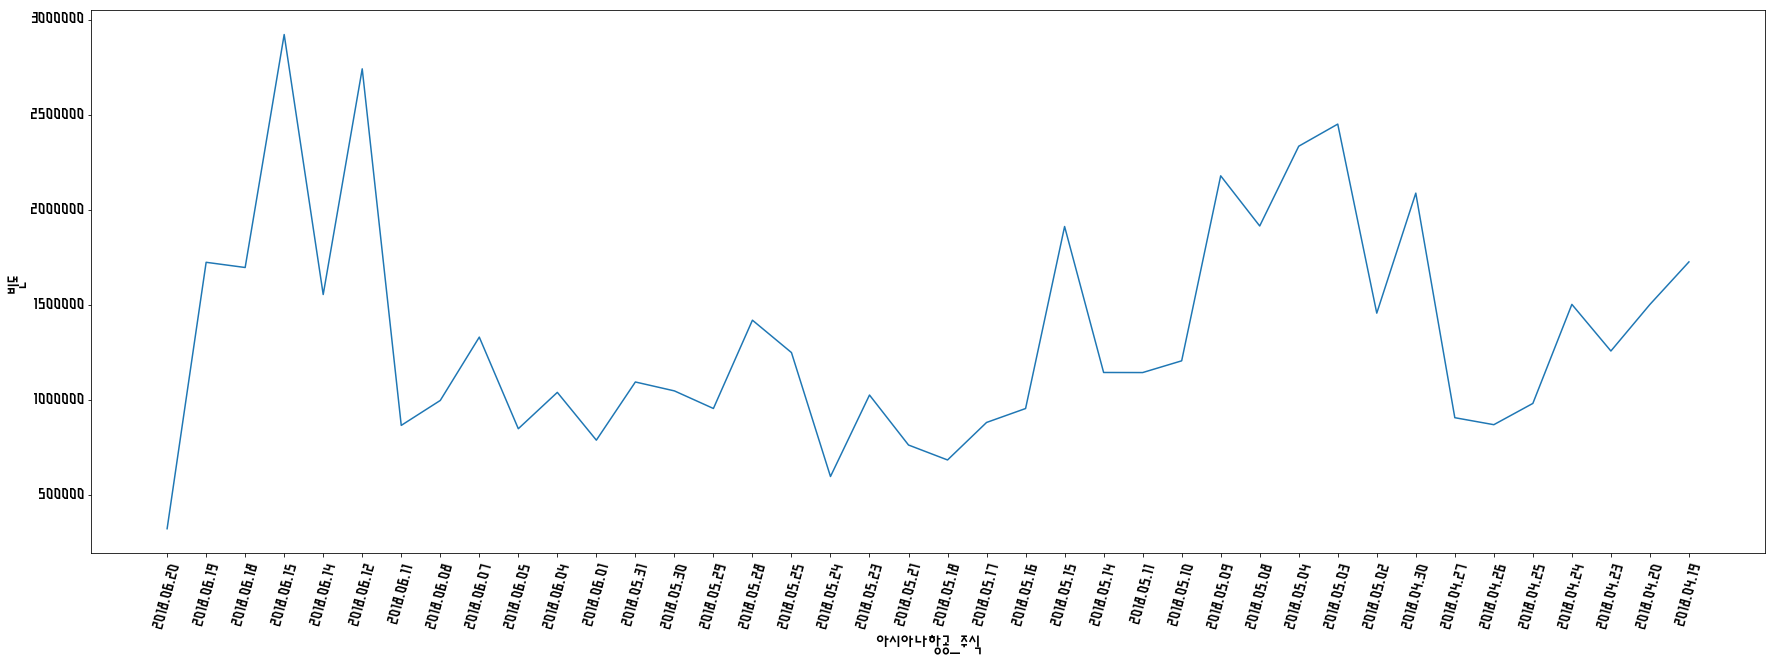

In [64]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["아시아나항공_수익"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('아시아나항공_주식',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# 아시아나항공_주식에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. IMBC

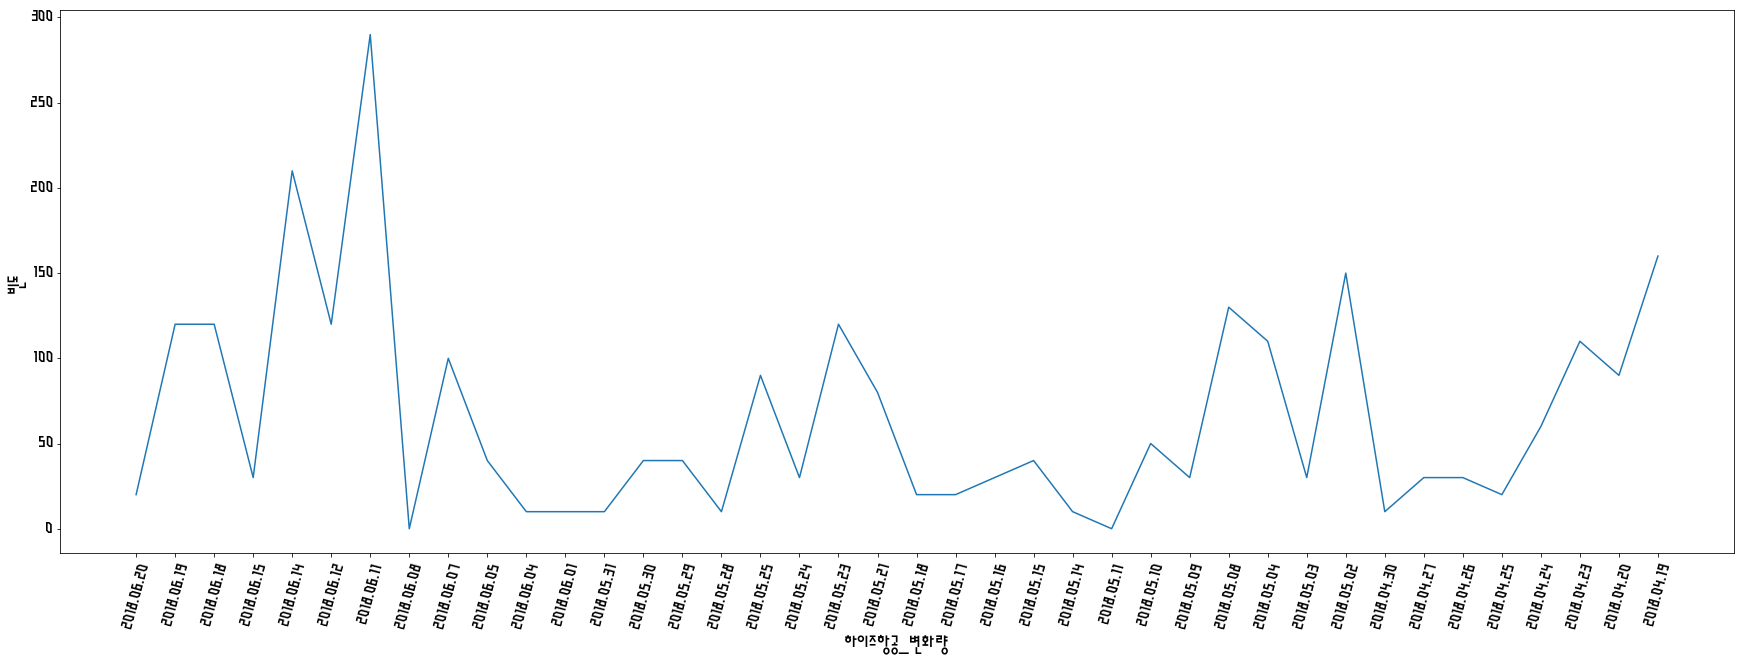

In [65]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["하이즈항공_변화량"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('하이즈항공_변화량',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# 하이즈항공_변화량에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. 

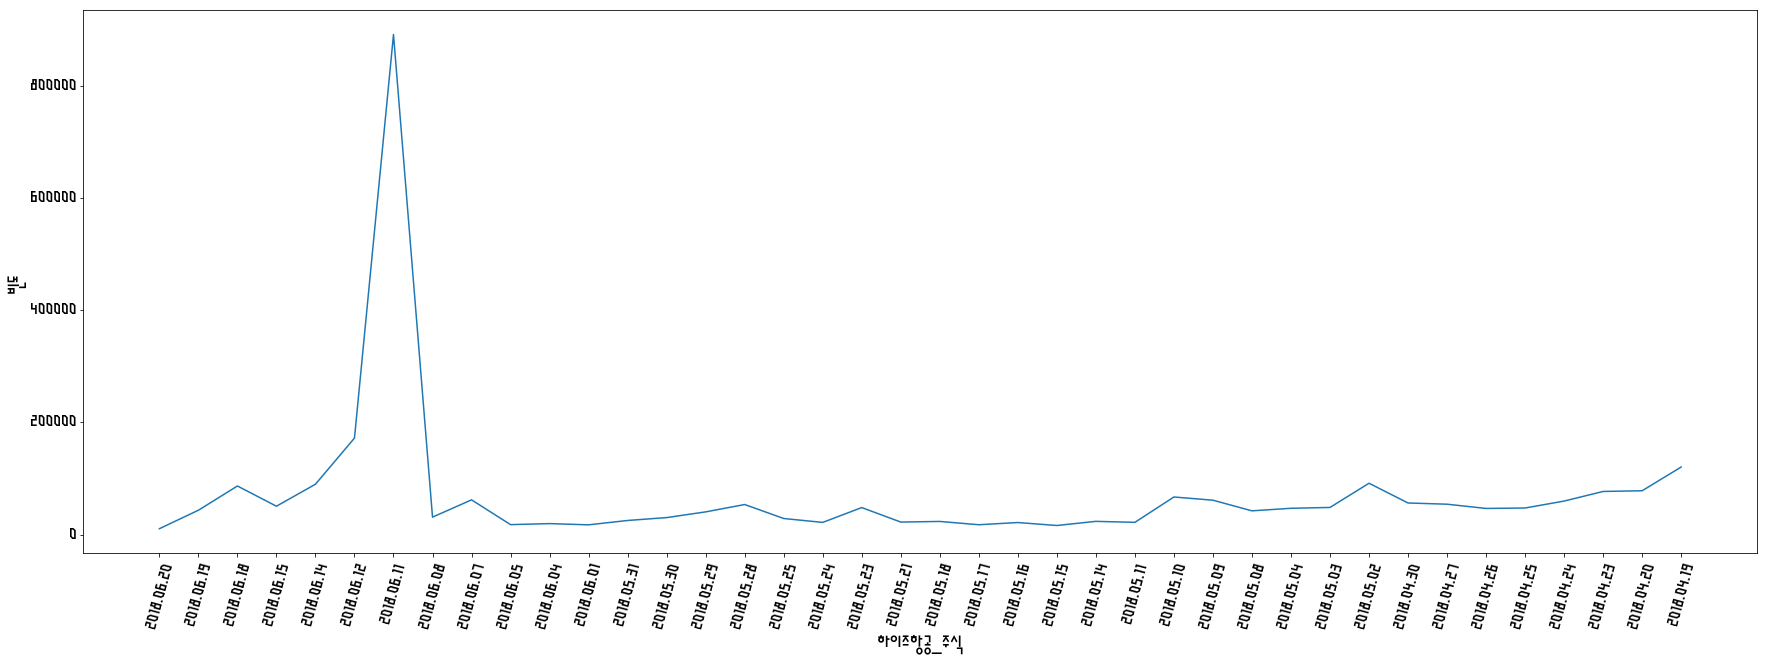

In [66]:
font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (30,10)
matplotlib.pyplot.xticks(fontsize=20)
matplotlib.pyplot.yticks(fontsize=20)
sorted(Final.index,reverse=True)     
plt.plot(sorted(Final.index,reverse=False), Final["하이즈항공_수익"])
plt.xticks(sorted(Final.index,reverse=False), Final.index, rotation='75')
plt.xlabel('하이즈항공_주식',fontsize=20) 
plt.ylabel('빈도',fontsize=20) 
plt.show()
# 하이즈항공_주식에 대한 통계를 그래프화 한다. 
# Final을 사용하는 이유는 Final은 조사한 주식들 전체를 병합했기때문에 Final을 사용해서 정해놓은 40일 전까지만의 데이터를 불러와서 그래프화 한다. IMBC

In [67]:
import numpy as np
import math

In [68]:
np.corrcoef(list(Final['KB금융_변화량']), list(Final['KB금융_수익']))
# 각 주식들의 상관관계를 확인한다. 
# 여기서 1의 경우 자기자신이기 때문에 1이나오는것이고 x와 y, y와 x의경우 1과 가까우면 상관관계가 높은것이다. 

array([[1.        , 0.49645727],
       [0.49645727, 1.        ]])

In [69]:
np.corrcoef(list(Final['CJ_변화량']), list(Final['CJ_수익']))
# 각 주식들의 상관관계를 확인한다. 
# 여기서 1의 경우 자기자신이기 때문에 1이나오는것이고 x와 y, y와 x의경우 1과 가까우면 상관관계가 높은것이다. 

array([[1.        , 0.71160859],
       [0.71160859, 1.        ]])

In [70]:
np.corrcoef(list(Final['신세계푸드_변화량']), list(Final['신세계푸드_수익']))
# 각 주식들의 상관관계를 확인한다. 
# 여기서 1의 경우 자기자신이기 때문에 1이나오는것이고 x와 y, y와 x의경우 1과 가까우면 상관관계가 높은것이다. 

array([[1.        , 0.33117209],
       [0.33117209, 1.        ]])

In [71]:
np.corrcoef(list(Final['YG_변화량']), list(Final['YG_수익']))
# 각 주식들의 상관관계를 확인한다. 
# 여기서 1의 경우 자기자신이기 때문에 1이나오는것이고 x와 y, y와 x의경우 1과 가까우면 상관관계가 높은것이다. 

array([[1.        , 0.47255546],
       [0.47255546, 1.        ]])

In [72]:
np.corrcoef(list(Final['IMBC_변화량']), list(Final['IMBC_수익']))
# 각 주식들의 상관관계를 확인한다. 
# 여기서 1의 경우 자기자신이기 때문에 1이나오는것이고 x와 y, y와 x의경우 1과 가까우면 상관관계가 높은것이다. 

array([[1.        , 0.85408568],
       [0.85408568, 1.        ]])

In [73]:
np.corrcoef(list(Final['포스코_변화량']), list(Final['포스코_수익']))
# 각 주식들의 상관관계를 확인한다. 
# 여기서 1의 경우 자기자신이기 때문에 1이나오는것이고 x와 y, y와 x의경우 1과 가까우면 상관관계가 높은것이다. 

array([[1.        , 0.32589511],
       [0.32589511, 1.        ]])

In [74]:
np.corrcoef(list(Final['SAMSUNG_변화량']), list(Final['SAMSUNG_수익']))
# 각 주식들의 상관관계를 확인한다. 
# 여기서 1의 경우 자기자신이기 때문에 1이나오는것이고 x와 y, y와 x의경우 1과 가까우면 상관관계가 높은것이다. 

array([[ 1.        , -0.37646712],
       [-0.37646712,  1.        ]])

In [75]:
np.corrcoef(list(Final['오뚜기_변화량']), list(Final['오뚜기_수익']))
# 각 주식들의 상관관계를 확인한다. 
# 여기서 1의 경우 자기자신이기 때문에 1이나오는것이고 x와 y, y와 x의경우 1과 가까우면 상관관계가 높은것이다. 

array([[1.        , 0.61065261],
       [0.61065261, 1.        ]])

In [76]:
np.corrcoef(list(Final['NAVER_변화량']), list(Final['NAVER_수익']))
# 각 주식들의 상관관계를 확인한다. 
# 여기서 1의 경우 자기자신이기 때문에 1이나오는것이고 x와 y, y와 x의경우 1과 가까우면 상관관계가 높은것이다. 

array([[1.        , 0.63295336],
       [0.63295336, 1.        ]])

In [77]:
np.corrcoef(list(Final['SBS_변화량']), list(Final['SBS_수익']))
# 각 주식들의 상관관계를 확인한다. 
# 여기서 1의 경우 자기자신이기 때문에 1이나오는것이고 x와 y, y와 x의경우 1과 가까우면 상관관계가 높은것이다. 

array([[1.        , 0.36555502],
       [0.36555502, 1.        ]])

In [78]:
np.corrcoef(list(Final['농심_변화량']), list(Final['농심_수익']))
# 각 주식들의 상관관계를 확인한다. 
# 여기서 1의 경우 자기자신이기 때문에 1이나오는것이고 x와 y, y와 x의경우 1과 가까우면 상관관계가 높은것이다. 

array([[1.        , 0.66479891],
       [0.66479891, 1.        ]])

In [79]:
np.corrcoef(list(Final['대한항공_변화량']), list(Final['대한항공_수익']))
# 각 주식들의 상관관계를 확인한다. 
# 여기서 1의 경우 자기자신이기 때문에 1이나오는것이고 x와 y, y와 x의경우 1과 가까우면 상관관계가 높은것이다. 

array([[1.        , 0.68775988],
       [0.68775988, 1.        ]])

In [80]:
np.corrcoef(list(Final['아시아나항공_변화량']), list(Final['아시아나항공_수익']))
# 각 주식들의 상관관계를 확인한다. 
# 여기서 1의 경우 자기자신이기 때문에 1이나오는것이고 x와 y, y와 x의경우 1과 가까우면 상관관계가 높은것이다. 

array([[1.        , 0.61813022],
       [0.61813022, 1.        ]])

In [81]:
np.corrcoef(list(Final['하이즈항공_변화량']), list(Final['하이즈항공_수익']))
# 각 주식들의 상관관계를 확인한다. 
# 여기서 1의 경우 자기자신이기 때문에 1이나오는것이고 x와 y, y와 x의경우 1과 가까우면 상관관계가 높은것이다. 

array([[1.        , 0.68093688],
       [0.68093688, 1.        ]])

In [82]:
np.corrcoef(list(Final['CJ푸드_변화량']), list(Final['CJ푸드_수익']))
# 각 주식들의 상관관계를 확인한다. 
# 여기서 1의 경우 자기자신이기 때문에 1이나오는것이고 x와 y, y와 x의경우 1과 가까우면 상관관계가 높은것이다. 

array([[1.       , 0.7396995],
       [0.7396995, 1.       ]])

In [83]:
cj_c = pd.DataFrame(cj_a,columns={'CJ_변화량'})
KB_bank_c = pd.DataFrame(KB_bank_a,columns={'KB금융_변화량'})
S_food_c = pd.DataFrame(S_food_a,columns={'신세계푸드_변화량'})
YG_plus_c = pd.DataFrame(YG_plus_a,columns={'YG_변화량'})
Imbc_c = pd.DataFrame(Imbc_a,columns={'IMBC_변화량'})
posco_c = pd.DataFrame(posco_a,columns={'포스코_변화량'})
samsung_c = pd.DataFrame(samsung_a,columns={'SAMSUNG_변화량'})
o_dg_c = pd.DataFrame(o_dg_a,columns={'오뚜기_변화량'})
naver_c = pd.DataFrame(naver_a,columns={'NAVER_변화량'})
sbs_c = pd.DataFrame(sbs_a,columns={'SBS_변화량'})
Nong_c = pd.DataFrame(Nong_a,columns={'농심_변화량'})
K_a_c = pd.DataFrame(K_a_a,columns={'대한항공_변화량'})
A_a_c = pd.DataFrame(A_a_a,columns={'아시아나항공_변화량'})
H_a_c = pd.DataFrame(H_a_a,columns={'하이즈항공_변화량'})
cj_food_c = pd.DataFrame(cj_food_a,columns={'CJ푸드_변화량'})

In [84]:
food1 = pd.merge(Nong_c, cj_food_c, how="inner",left_index=True,right_index=True)
food2 = pd.merge(food1, S_food_c, how="inner",left_index=True,right_index=True)
foodF = pd.merge(food2, o_dg_c, how="inner",left_index=True,right_index=True)

# 음식관련된 회사들의 주식을 상관관계를 찾기위해 병합한다. 

In [85]:
Food = foodF.corr(method='pearson')
print(Food)
# 음식회사들의 변화량에 따른 상관관계 분석 

             농심_변화량  CJ푸드_변화량  신세계푸드_변화량   오뚜기_변화량
농심_변화량     1.000000 -0.022210   0.103347  0.259203
CJ푸드_변화량  -0.022210  1.000000   0.115314  0.137797
신세계푸드_변화량  0.103347  0.115314   1.000000 -0.126655
오뚜기_변화량    0.259203  0.137797  -0.126655  1.000000


In [86]:
Air1 = pd.merge(H_a_c, A_a_c, how="inner",left_index=True,right_index=True)
AirF = pd.merge(Air1, K_a_c, how="inner",left_index=True,right_index=True)

# 항공관련된 회사들의 주식을 상관관계를 찾기위해 병합한다. 

In [87]:
Air = AirF.corr(method='pearson')
print(Air)
# 항공회사들의 변화량에 따른 상관관계 분석 

            하이즈항공_변화량  아시아나항공_변화량  대한항공_변화량
하이즈항공_변화량    1.000000    0.135814  0.107078
아시아나항공_변화량   0.135814    1.000000  0.293675
대한항공_변화량     0.107078    0.293675  1.000000


In [88]:
Big1 = pd.merge(cj_c, KB_bank_c, how="inner",left_index=True,right_index=True)
Big2 = pd.merge(Big1, YG_plus_c, how="inner",left_index=True,right_index=True)
Big3 = pd.merge(Big2, posco_c, how="inner",left_index=True,right_index=True)
Big4 = pd.merge(Big3, samsung_c, how="inner",left_index=True,right_index=True)
BigF = pd.merge(Big4, naver_c, how="inner",left_index=True,right_index=True)

# 대기업의 주식을 상관관계를 찾기위해 병합한다. 

In [89]:
Big = BigF.corr(method='pearson')
print(Big)
# 대기업들의 변화량에 따른 상관관계 분석 

               CJ_변화량  KB금융_변화량    YG_변화량   포스코_변화량  SAMSUNG_변화량  NAVER_변화량
CJ_변화량       1.000000  0.105789  0.182738  0.131368    -0.011987   0.247016
KB금융_변화량     0.105789  1.000000 -0.119624  0.079305     0.077293   0.069456
YG_변화량       0.182738 -0.119624  1.000000  0.068298    -0.048196   0.123992
포스코_변화량      0.131368  0.079305  0.068298  1.000000    -0.005629  -0.172722
SAMSUNG_변화량 -0.011987  0.077293 -0.048196 -0.005629     1.000000   0.233567
NAVER_변화량    0.247016  0.069456  0.123992 -0.172722     0.233567   1.000000


In [90]:
newsF = pd.merge(Imbc_c, sbs_c, how="inner",left_index=True,right_index=True)

# 방송국의 주식을 상관관계를 찾기위해 병합한다. 

In [91]:
news = newsF.corr(method='pearson')
print(news)
# 방송국의 변화량에 따른 상관관계 분석 

          IMBC_변화량   SBS_변화량
IMBC_변화량  1.000000  0.014247
SBS_변화량   0.014247  1.000000


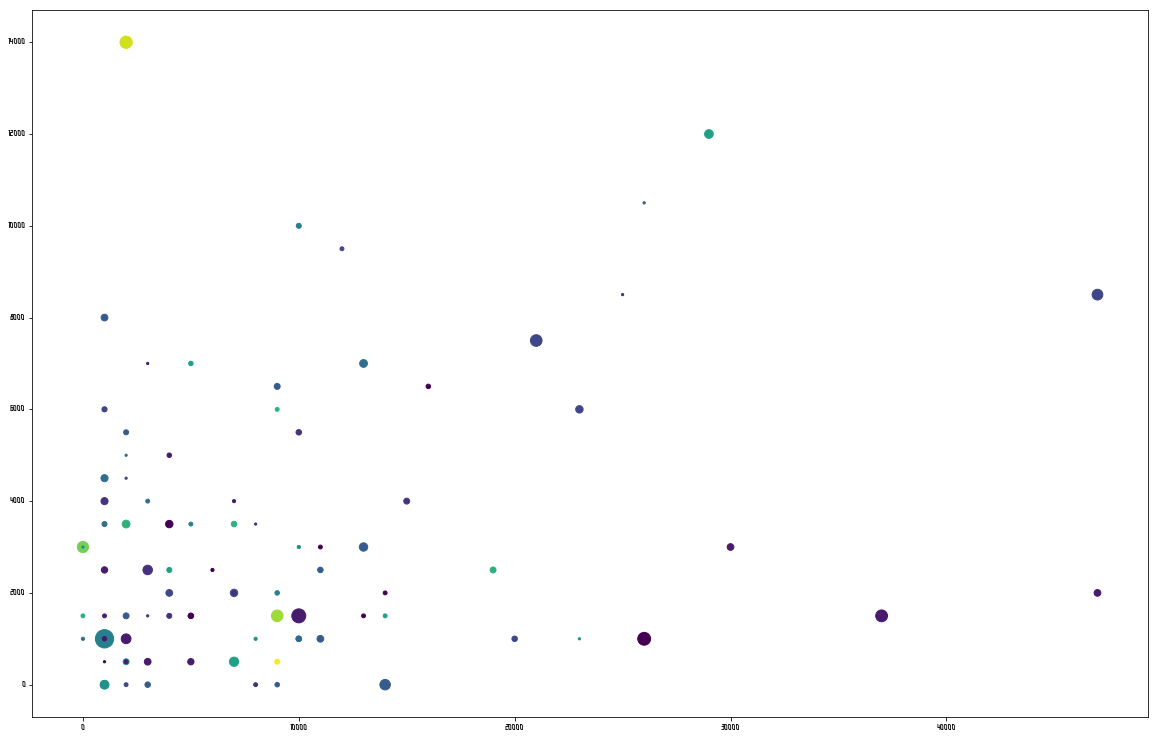

In [92]:
plt.figure(figsize  = (20,13))
plt.scatter(foodF['오뚜기_변화량'], foodF['농심_변화량'], foodF['CJ푸드_변화량'], foodF['신세계푸드_변화량'])
plt.show()


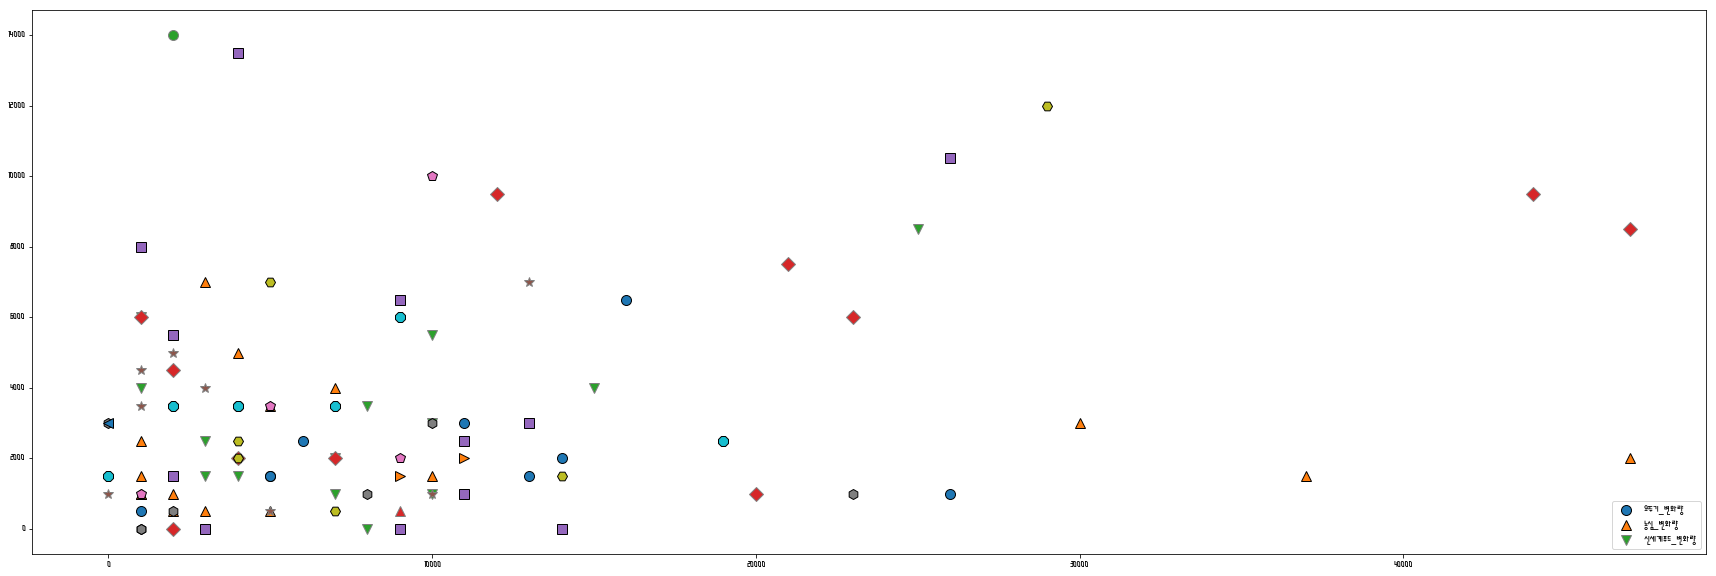

In [93]:
import mglearn
mglearn.discrete_scatter(foodF['오뚜기_변화량'],foodF['농심_변화량'],foodF['신세계푸드_변화량'])
plt.legend(["오뚜기_변화량", "농심_변화량","신세계푸드_변화량"], loc=4)
plt.show()

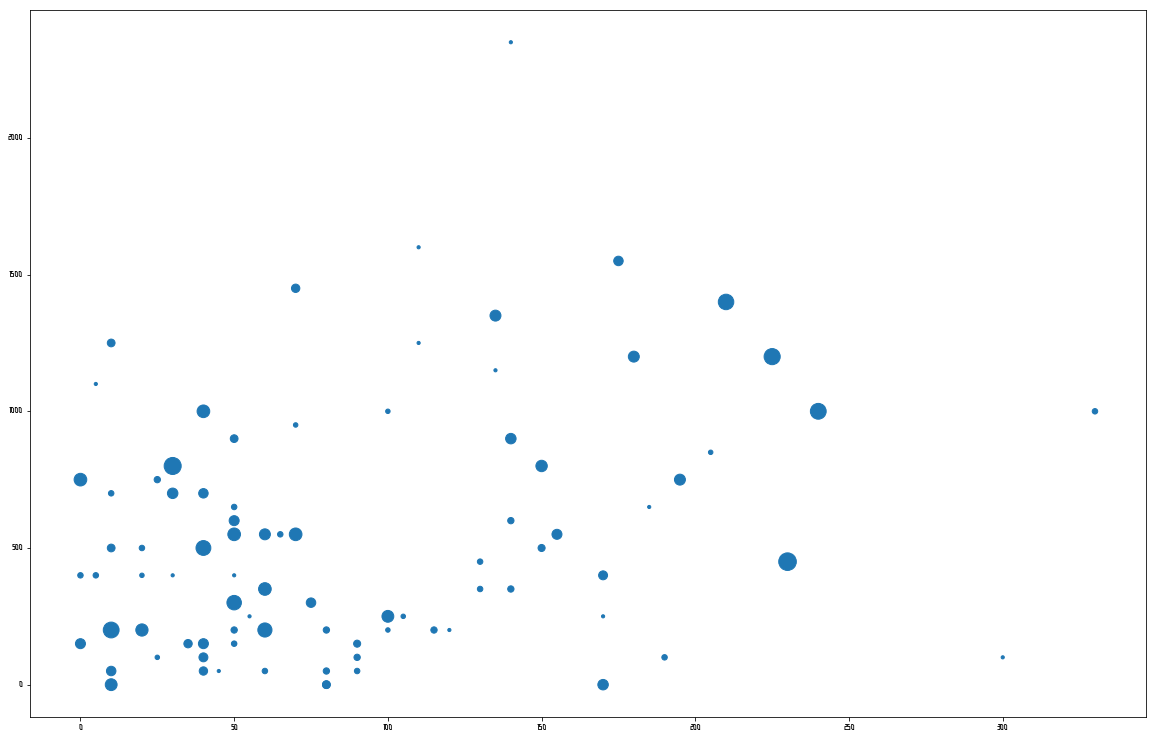

In [94]:
plt.figure(figsize  = (20,13))
plt.scatter(AirF['아시아나항공_변화량'], AirF['대한항공_변화량'], AirF['하이즈항공_변화량'])
plt.show()

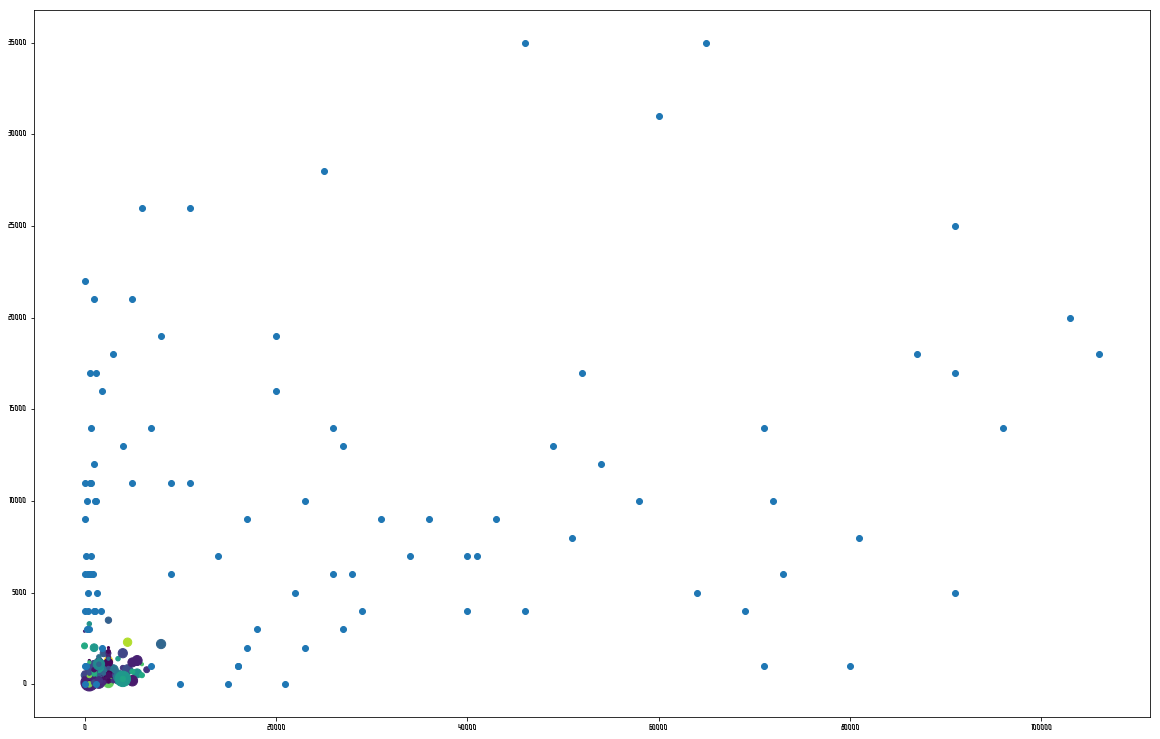

In [95]:
plt.figure(figsize  = (20,13))
plt.scatter(BigF['CJ_변화량'], BigF['KB금융_변화량'], BigF['YG_변화량'], BigF['포스코_변화량'])
plt.scatter(BigF['SAMSUNG_변화량'], BigF['NAVER_변화량'], marker='o')
plt.show()

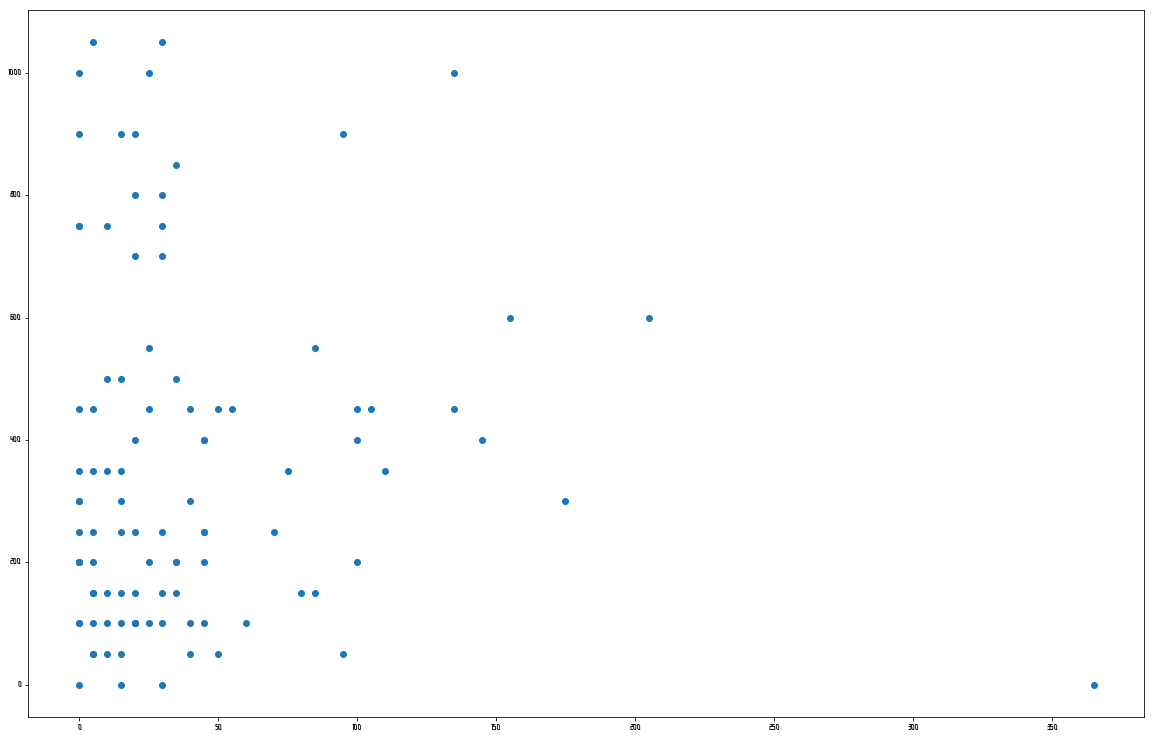

In [96]:
plt.figure(figsize  = (20,13))
plt.scatter(newsF['IMBC_변화량'], newsF['SBS_변화량'], marker='o')
plt.show()

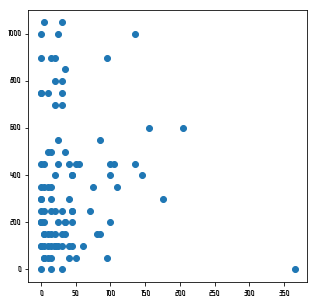

In [98]:
plt.figure(figsize  = (5,5))
plt.scatter(newsF['IMBC_변화량'], newsF['SBS_변화량'])
plt.show()